In [1]:
# Import des librairies 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import pycountry 
from collections import Counter 
import geopandas as gpd
from scipy.stats import gaussian_kde 

# Chargement des fichiers
df_data = pd.read_csv("/Users/axellerolain/Documents/education-data-analysis/data/EdStatsData.csv")
df_country = pd.read_csv("/Users/axellerolain/Documents/education-data-analysis/data/EdStatsCountry.csv")
df_country_series = pd.read_csv("/Users/axellerolain/Documents/education-data-analysis/data/EdStatsCountry-Series.csv")
df_footnote = pd.read_csv("/Users/axellerolain/Documents/education-data-analysis/data/EdStatsFootNote.csv")
df_series = pd.read_csv("/Users/axellerolain/Documents/education-data-analysis/data/EdStatsSeries.csv")


In [2]:
# Afficher la taille de chaque dataset
print("Taille Data:", df_data.shape)
print("Taille Country:", df_country.shape)
print("Taille Country-Series:", df_country_series.shape)
print("Taille Series:", df_series.shape)
print("Taille FootNote:", df_footnote.shape)

Taille Data: (886930, 70)
Taille Country: (241, 32)
Taille Country-Series: (613, 4)
Taille Series: (3665, 21)
Taille FootNote: (643638, 5)


## Affichage 5 premieres lignes des datasets (5)

In [3]:
# Affichage 5 premieres lignes du df data
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Affichage 5 premieres lignes du df country
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
# Affichage 5 premieres lignes du df country_series
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
# Affichage 5 premieres lignes du df series
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Affichage 5 premieres lignes du df footnote
df_footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


# EDA pour df data

In [8]:
# Affichage 10 premieres lignes du df data
df_data.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Describe df_data avec les colonnes en ligne pour une meilleure lisibilité
df_data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,886930,242,Arab World,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,886930,242,ARB,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Name,886930,3665,"Adjusted net enrolment rate, lower secondary, ...",242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Code,886930,3665,UIS.NERA.2,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,72288.0,NaN,NaN,NaN,1974772449.585474,121168685351.943085,-1.435564,0.89,6.317724,62.5125,19039286948196.101562
...,...,...,...,...,...,...,...,...,...,...,...
2085,51436.0,NaN,NaN,NaN,717.68987,24965.865778,-0.78,0.01,0.23,6.08,3337871.21
2090,51436.0,NaN,NaN,NaN,711.307183,25301.826635,-0.65,0.01,0.23,5.4625,3354746.27
2095,51436.0,NaN,NaN,NaN,703.42738,25560.691226,-0.55,0.01,0.23,4.68,3351886.89
2100,51436.0,NaN,NaN,NaN,694.029624,25741.892898,-0.45,0.01,0.22,4.0325,3330483.54


In [10]:
# Afficher la taille de chaque dataset
print("Taille Data:", df_data.shape) 

Taille Data: (886930, 70)


- 242 noms de pays pour 242 codes de pays ; c'est bon signe
- Idem avec les noms des indicateurs et leurs codes (3665)
- On compte 197 pays dans le monde (Source ONU - 2025) il y a donc une piste à creuser... 
- La colonne Unnamed:69 qui ne contient aucune valeur (probablement dû à un espace ou une virgule sur le fichier) donc à nettoyer.

- Nous avons chaque année jusque 2017 puis à partir de 2020 c'est de 5 ans en 5 ans jusque 2100... 
- Il sera intéressant de voir ce qui se passe s'il y a de la data manquante et à partir d'où 

In [11]:
df_data.info

<bound method DataFrame.info of        Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 y

In [12]:
print(df_data.duplicated().sum())

0


- Pas de doublons

In [13]:
missing_pct = (df_data.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_data = missing_pct.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_data.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_data)


           Colonne  Taux de valeurs manquantes (%)
0     Country Name                            0.00
1     Country Code                            0.00
2   Indicator Name                            0.00
3   Indicator Code                            0.00
4             1970                           91.85
..             ...                             ...
65            2085                           94.20
66            2090                           94.20
67            2095                           94.20
68            2100                           94.20
69     Unnamed: 69                          100.00

[70 rows x 2 columns]


# EDA pour Country

In [14]:
# Affichage 5 premieres lignes du df Country
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [15]:
# Describe df_country
df_country.describe(include="all")

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


In [16]:
# Afficher la taille du dataset Country
print("Taille Country:", df_country.shape)

Taille Country: (241, 32)


In [17]:
# Afficher .info du df_country
df_country.info

<bound method DataFrame.info of     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency

In [18]:
# Affichage proportion de valeurs manquantes dans le dataset country
missing_pct_country = (df_country.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_data_country = missing_pct_country.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_data_country.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_data_country)

                                              Colonne  \
0                                        Country Code   
1                                          Short Name   
2                                          Table Name   
3                                           Long Name   
4                                        2-alpha code   
5                                       Currency Unit   
6                                       Special Notes   
7                                              Region   
8                                        Income Group   
9                                           WB-2 code   
10                        National accounts base year   
11                   National accounts reference year   
12                                SNA price valuation   
13                                   Lending category   
14                                       Other groups   
15                        System of National Accounts   
16                      Alterna

# EDA Country Series

In [19]:
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [20]:
df_country_series.describe(include="all")

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


In [21]:
# Afficher .info du df_country_series
df_country_series.info

<bound method DataFrame.info of     CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statisti

In [22]:
# Affichage proportion de valeurs manquantes dans le dataset country_series
missing_pct_country_series = (df_country_series.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_country_series = missing_pct_country_series.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_country_series.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_country_series)

       Colonne  Taux de valeurs manquantes (%)
0  CountryCode                             0.0
1   SeriesCode                             0.0
2  DESCRIPTION                             0.0
3   Unnamed: 3                           100.0


# EDA Series

In [23]:
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_series.describe(include="all")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Afficher .info du df_series
df_series.info

<bound method DataFrame.info of                       Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
.

In [26]:
# Affichage proportion de valeurs manquantes dans le dataset series
missing_pct_series = (df_series.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_series = missing_pct_series.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_series.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_series)

                                Colonne  Taux de valeurs manquantes (%)
0                           Series Code                            0.00
1                                 Topic                            0.00
2                        Indicator Name                            0.00
3                      Short definition                           41.17
4                       Long definition                            0.00
5                       Unit of measure                          100.00
6                           Periodicity                           97.30
7                           Base Period                           91.43
8                           Other notes                           84.94
9                    Aggregation method                           98.72
10           Limitations and exceptions                           99.62
11           Notes from original source                          100.00
12                     General comments                         

# EDA Footnote

In [27]:
df_footnote.head(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [28]:
df_footnote.describe(include="all")

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [29]:
# Afficher .info du df_series
df_footnote.info

<bound method DataFrame.info of        CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...   

In [30]:
# Affichage proportion de valeurs manquantes dans le dataset footnote
missing_pct_footnote = (df_footnote.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_footnote = missing_pct_footnote.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_footnote.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_footnote)

       Colonne  Taux de valeurs manquantes (%)
0  CountryCode                             0.0
1   SeriesCode                             0.0
2         Year                             0.0
3  DESCRIPTION                             0.0
4   Unnamed: 4                           100.0


# Affichage des doublons

In [31]:
# Affichage des doublons dans les 5 datasets
print("Doublons dans df_data:", df_data.duplicated().sum())
print("Doublons dans df_country:", df_country.duplicated().sum())
print("Doublons dans df_country_series:", df_country_series.duplicated().sum()) 
print("Doublons dans df_series:", df_series.duplicated().sum())
print("Doublons dans df_footnote:", df_footnote.duplicated().sum()) 

Doublons dans df_data: 0
Doublons dans df_country: 0
Doublons dans df_country_series: 0
Doublons dans df_series: 0
Doublons dans df_footnote: 0


**Pas de doublons**

# Analyse et visualisation avec missingno 

## Dataset Data

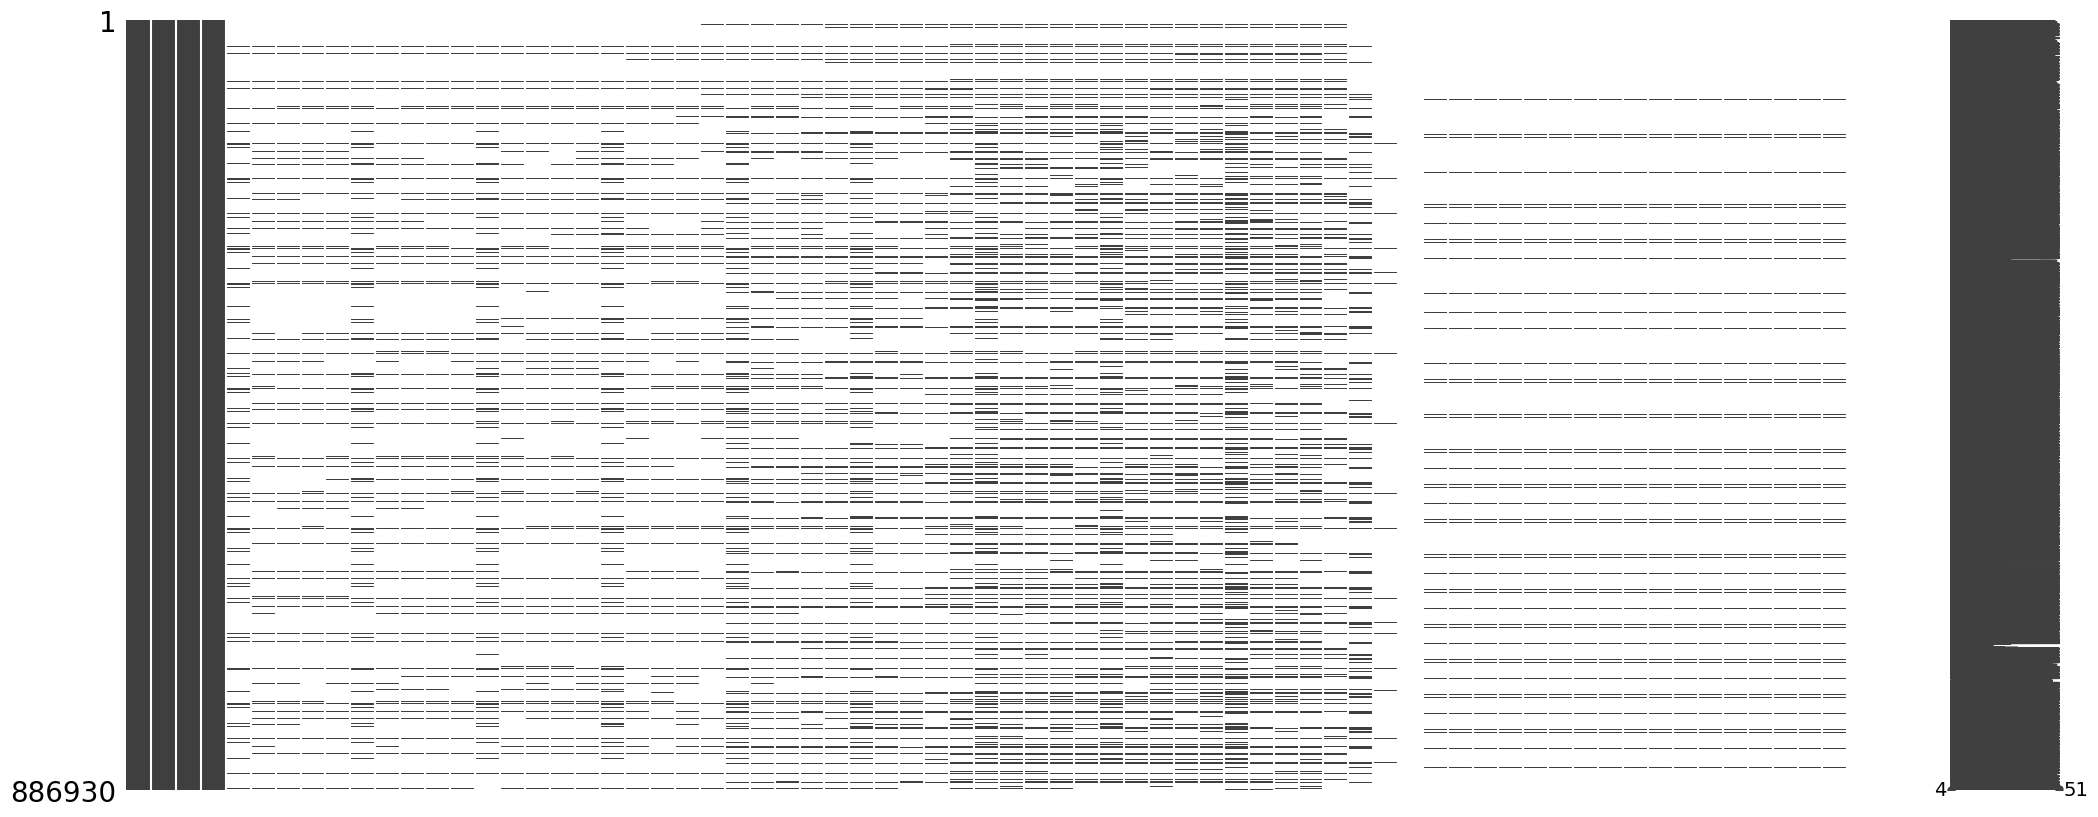

In [32]:
# Matrice des valeurs manquantes
msno.matrix(df_data)
plt.show()

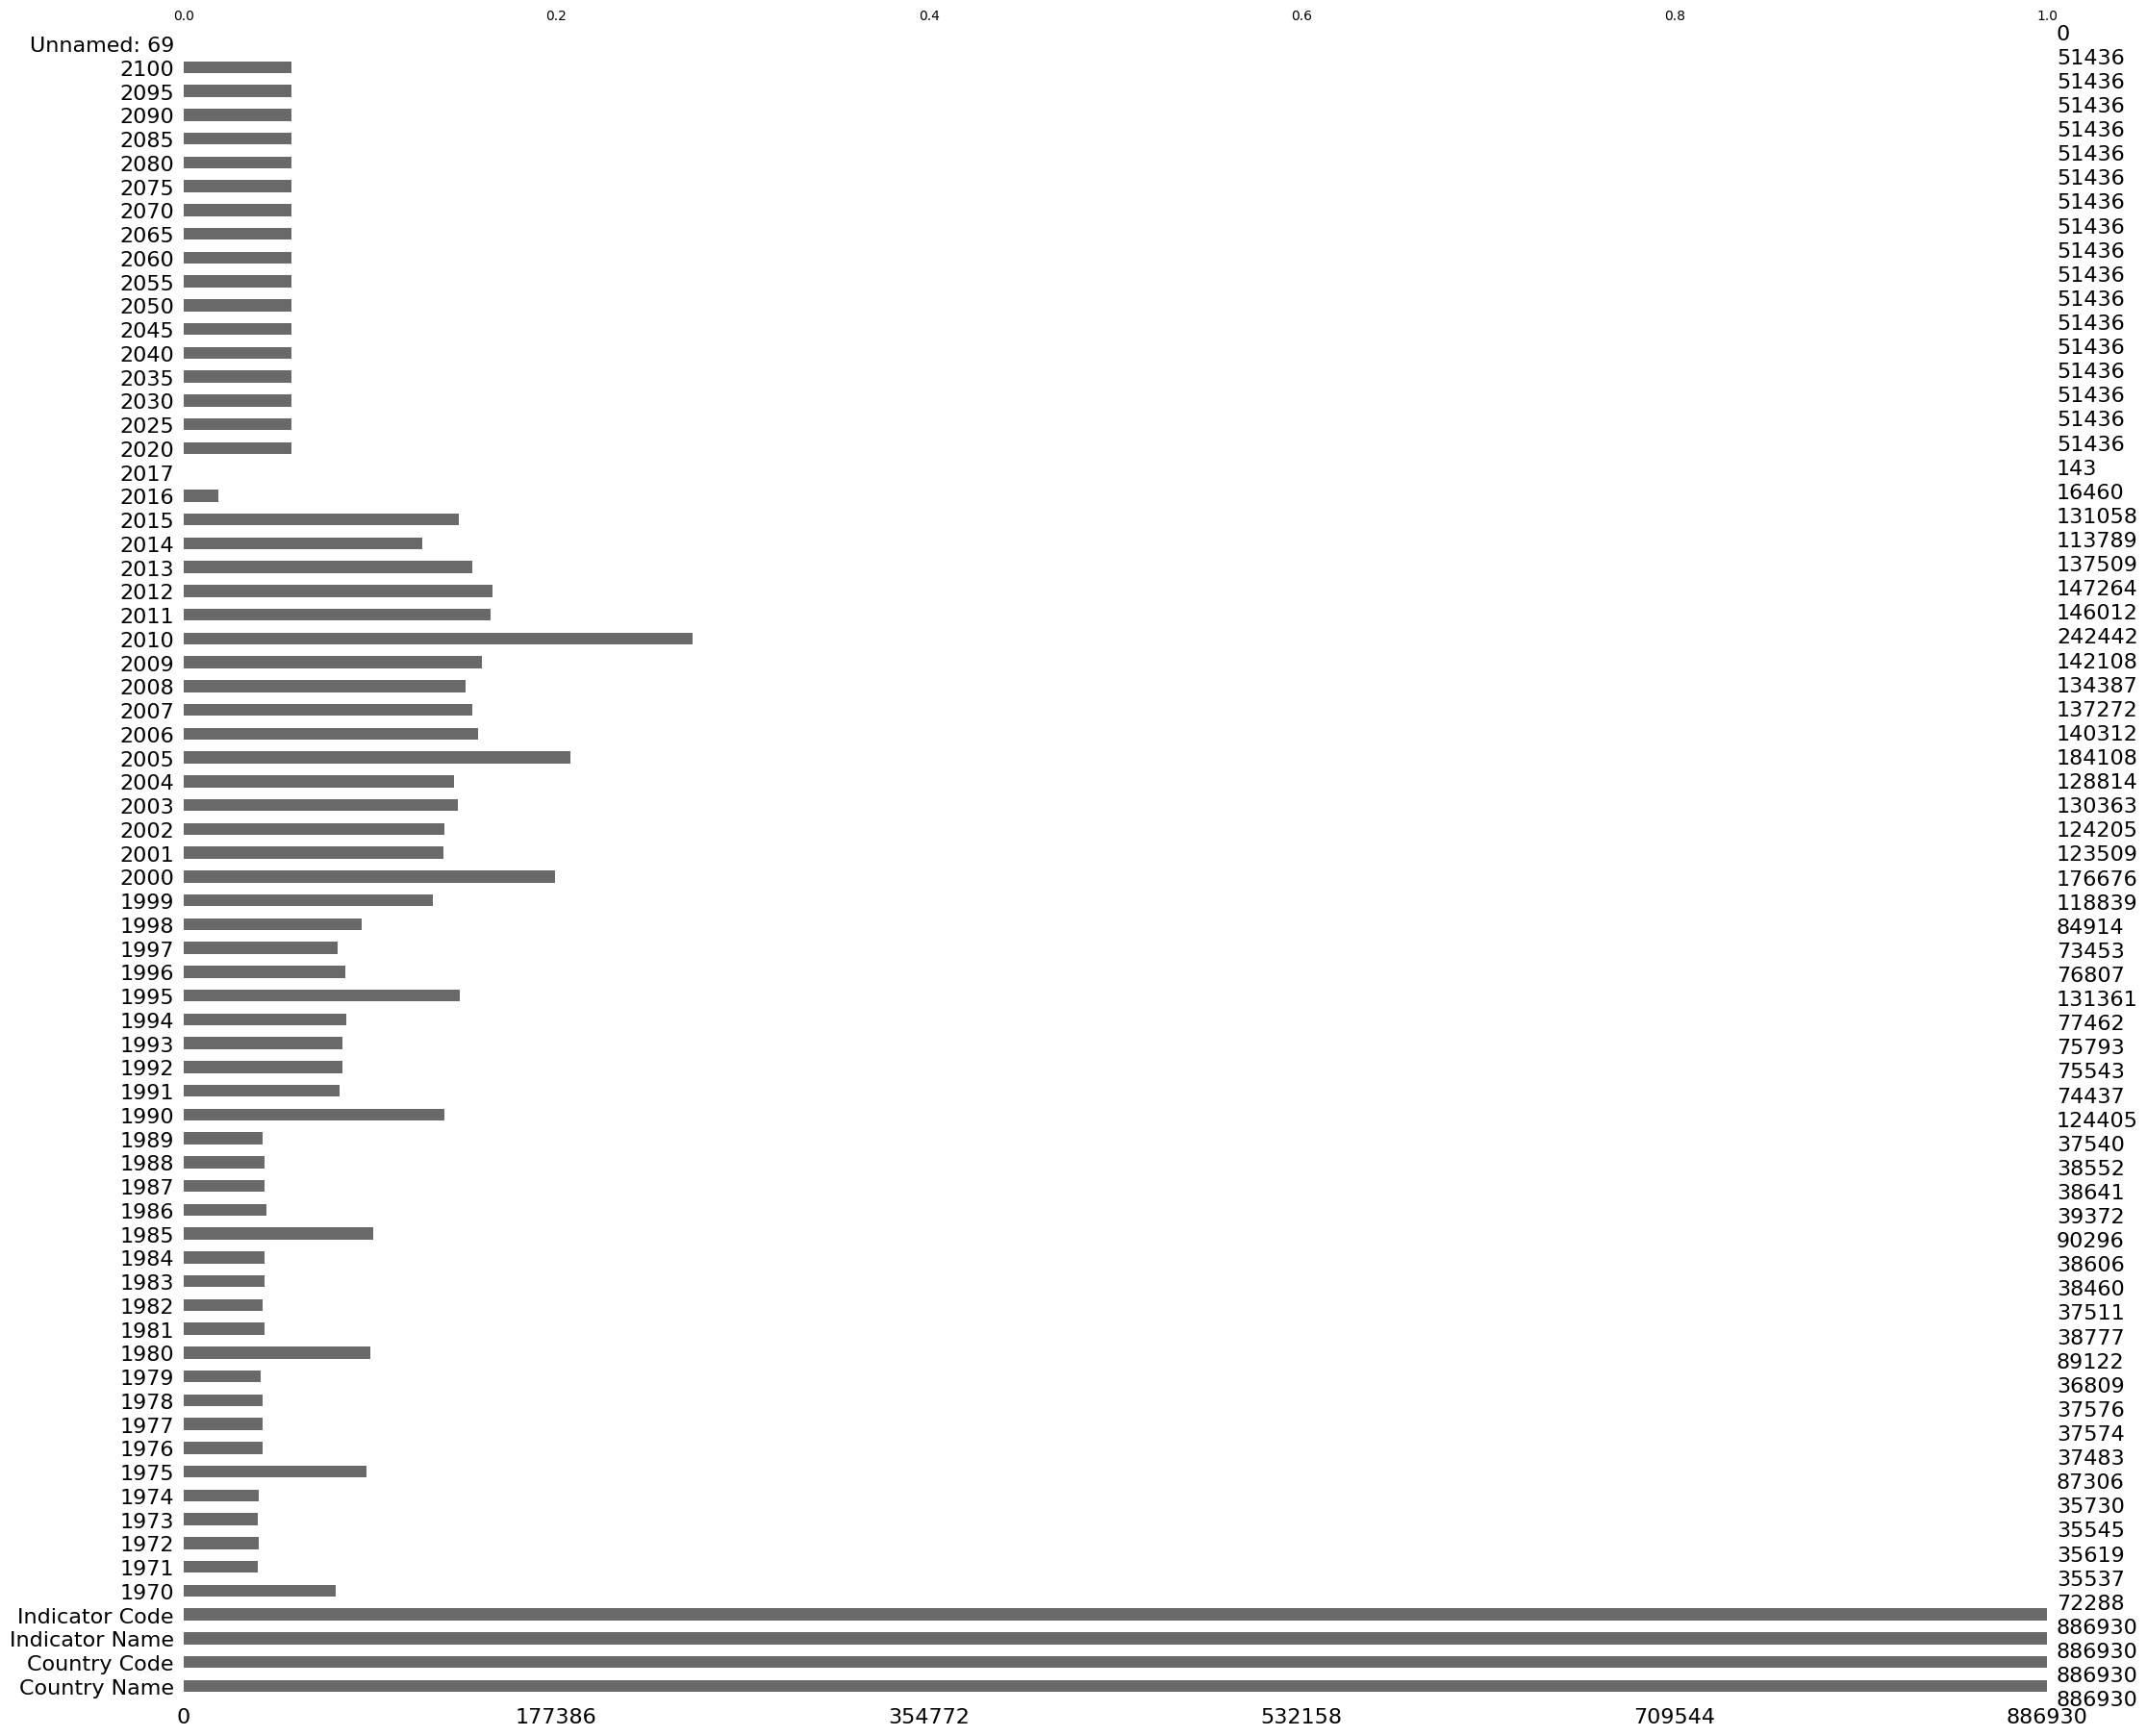

In [33]:
# Barres par colonne
msno.bar(df_data)
plt.show()

## Dataset Country

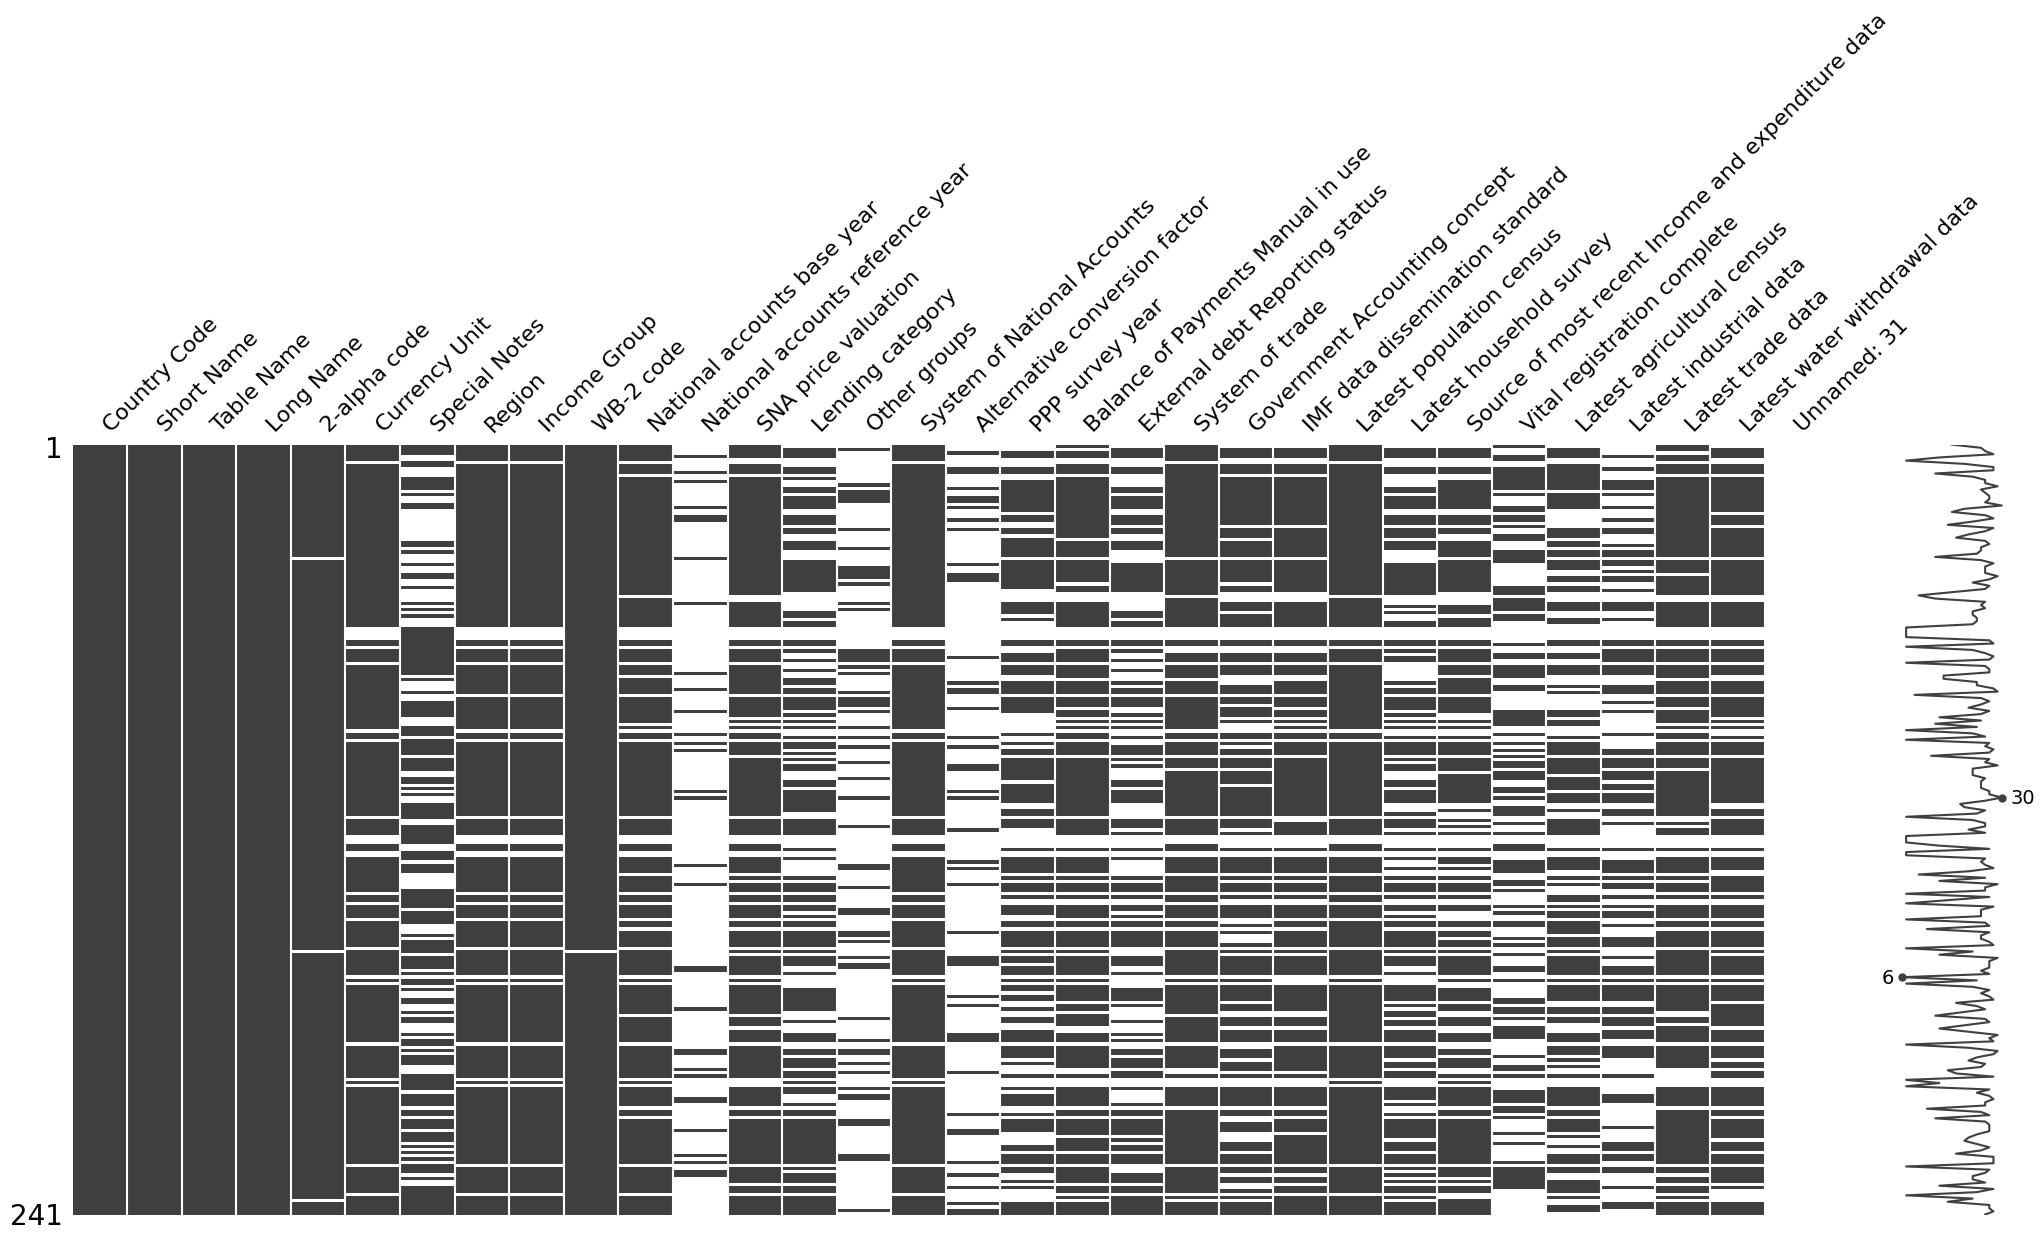

In [34]:
# Matrice des valeurs manquantes
msno.matrix(df_country)
plt.show()

## Dataset Country_series

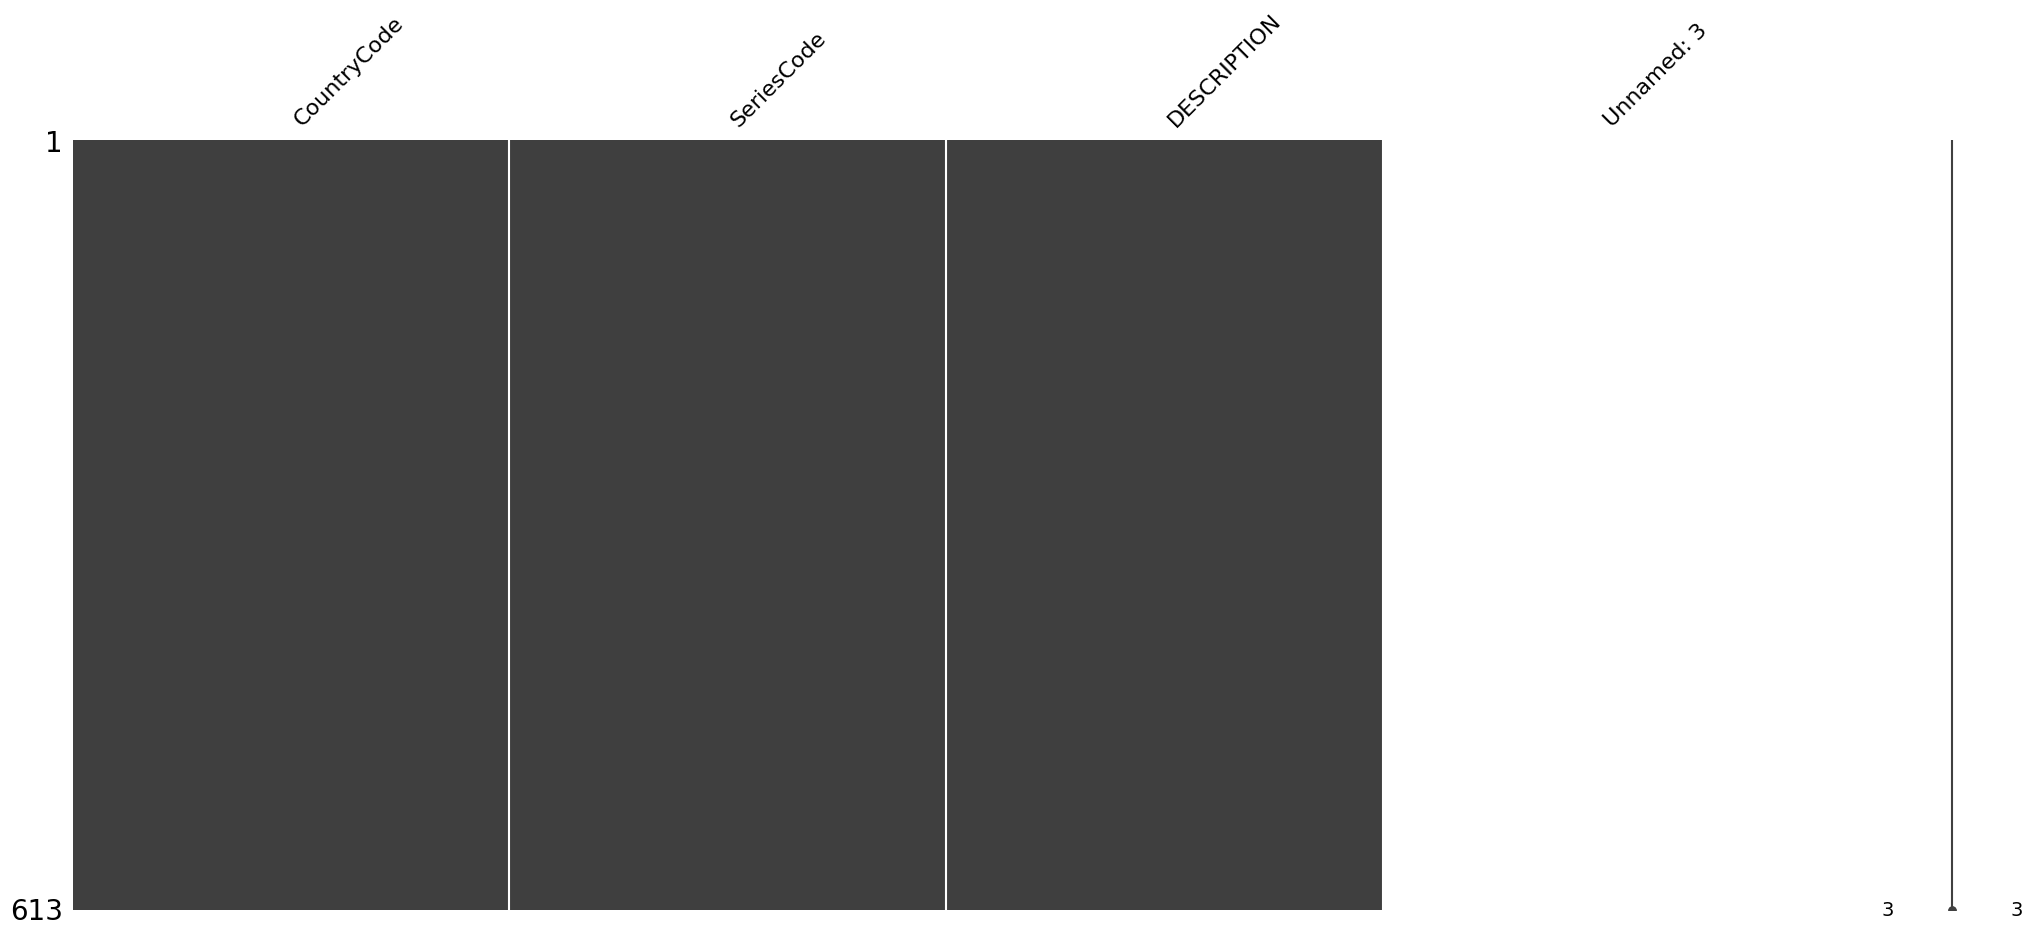

In [35]:
# Matrice des valeurs manquantes
msno.matrix(df_country_series)
plt.show()

## Dataset Series

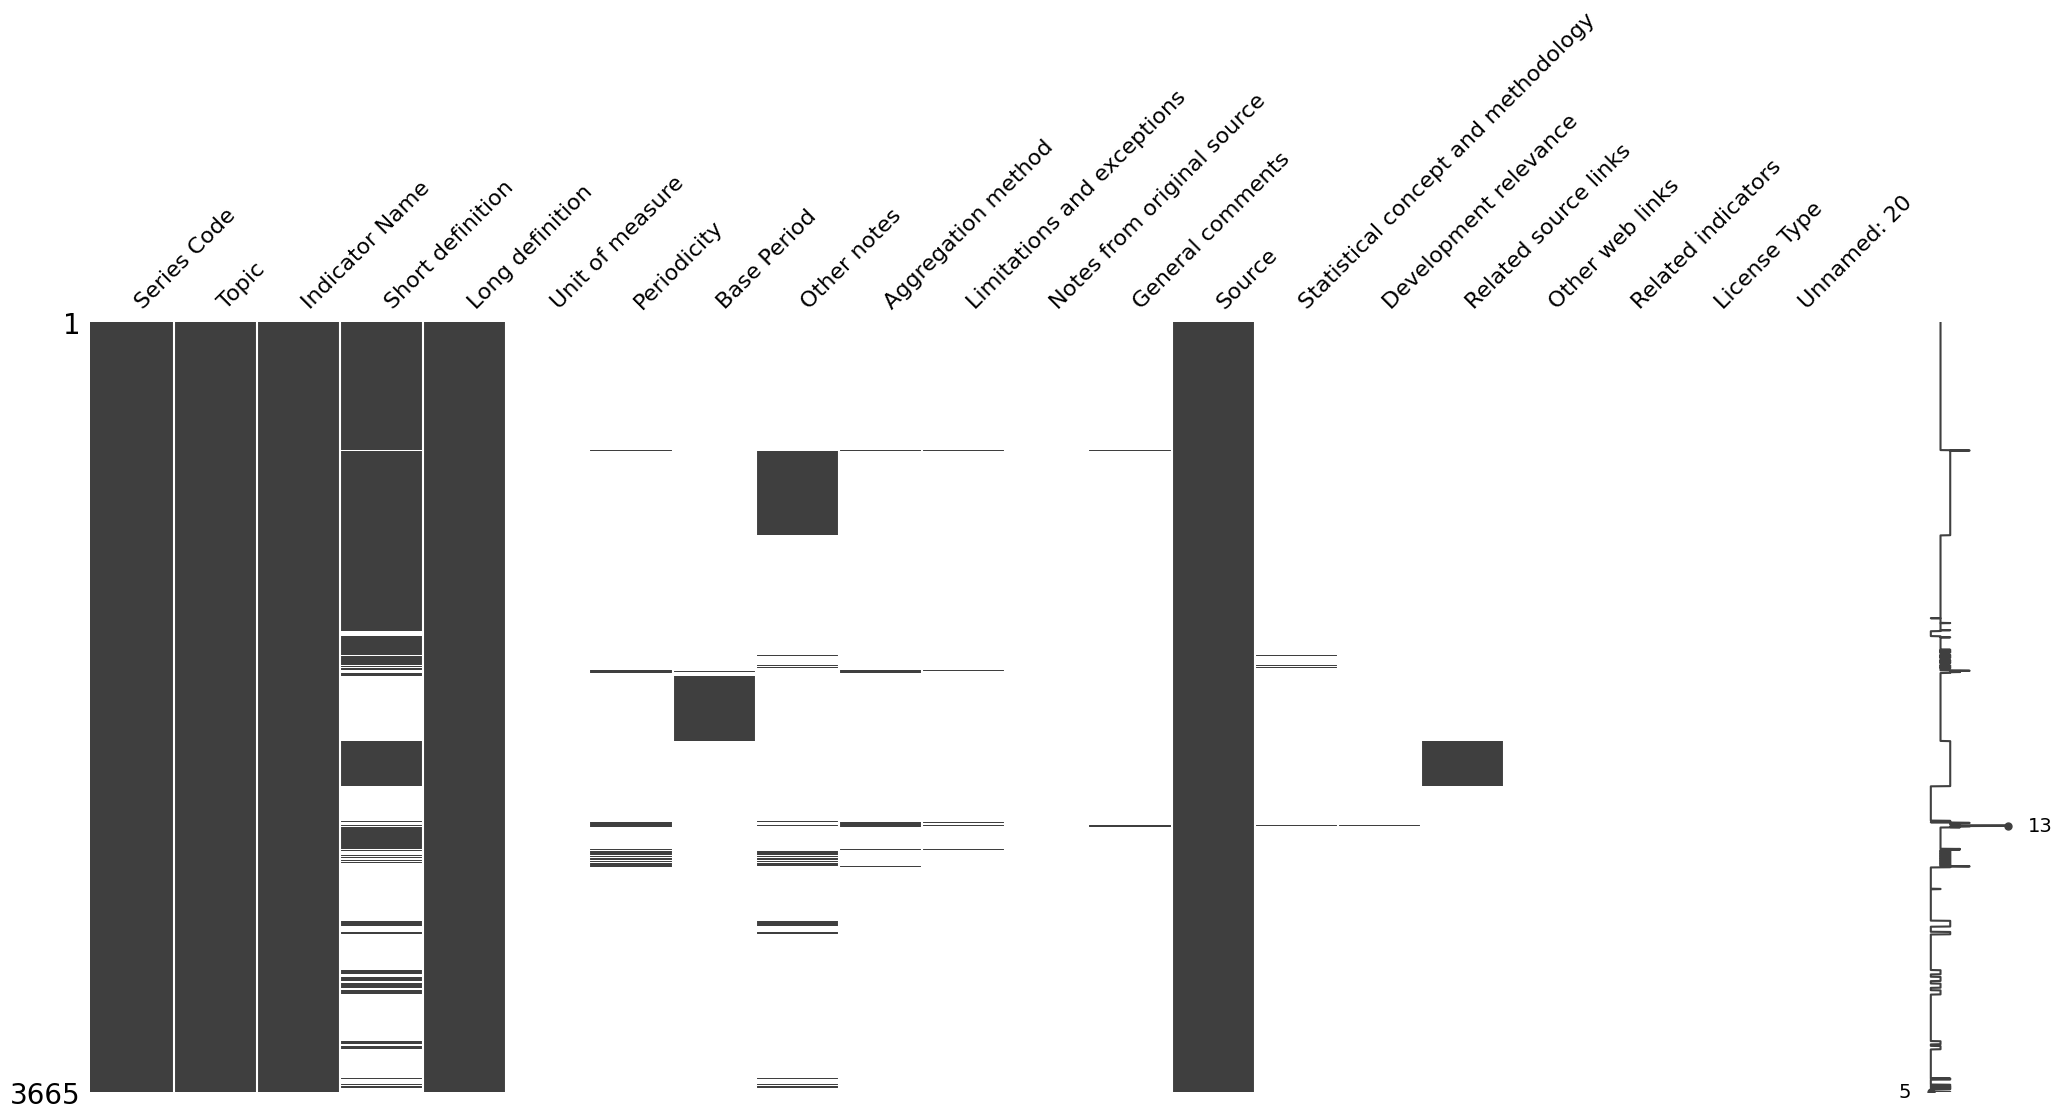

In [36]:
# Matrice des valeurs manquantes
msno.matrix(df_series)
plt.show()

## Dataset Footnote

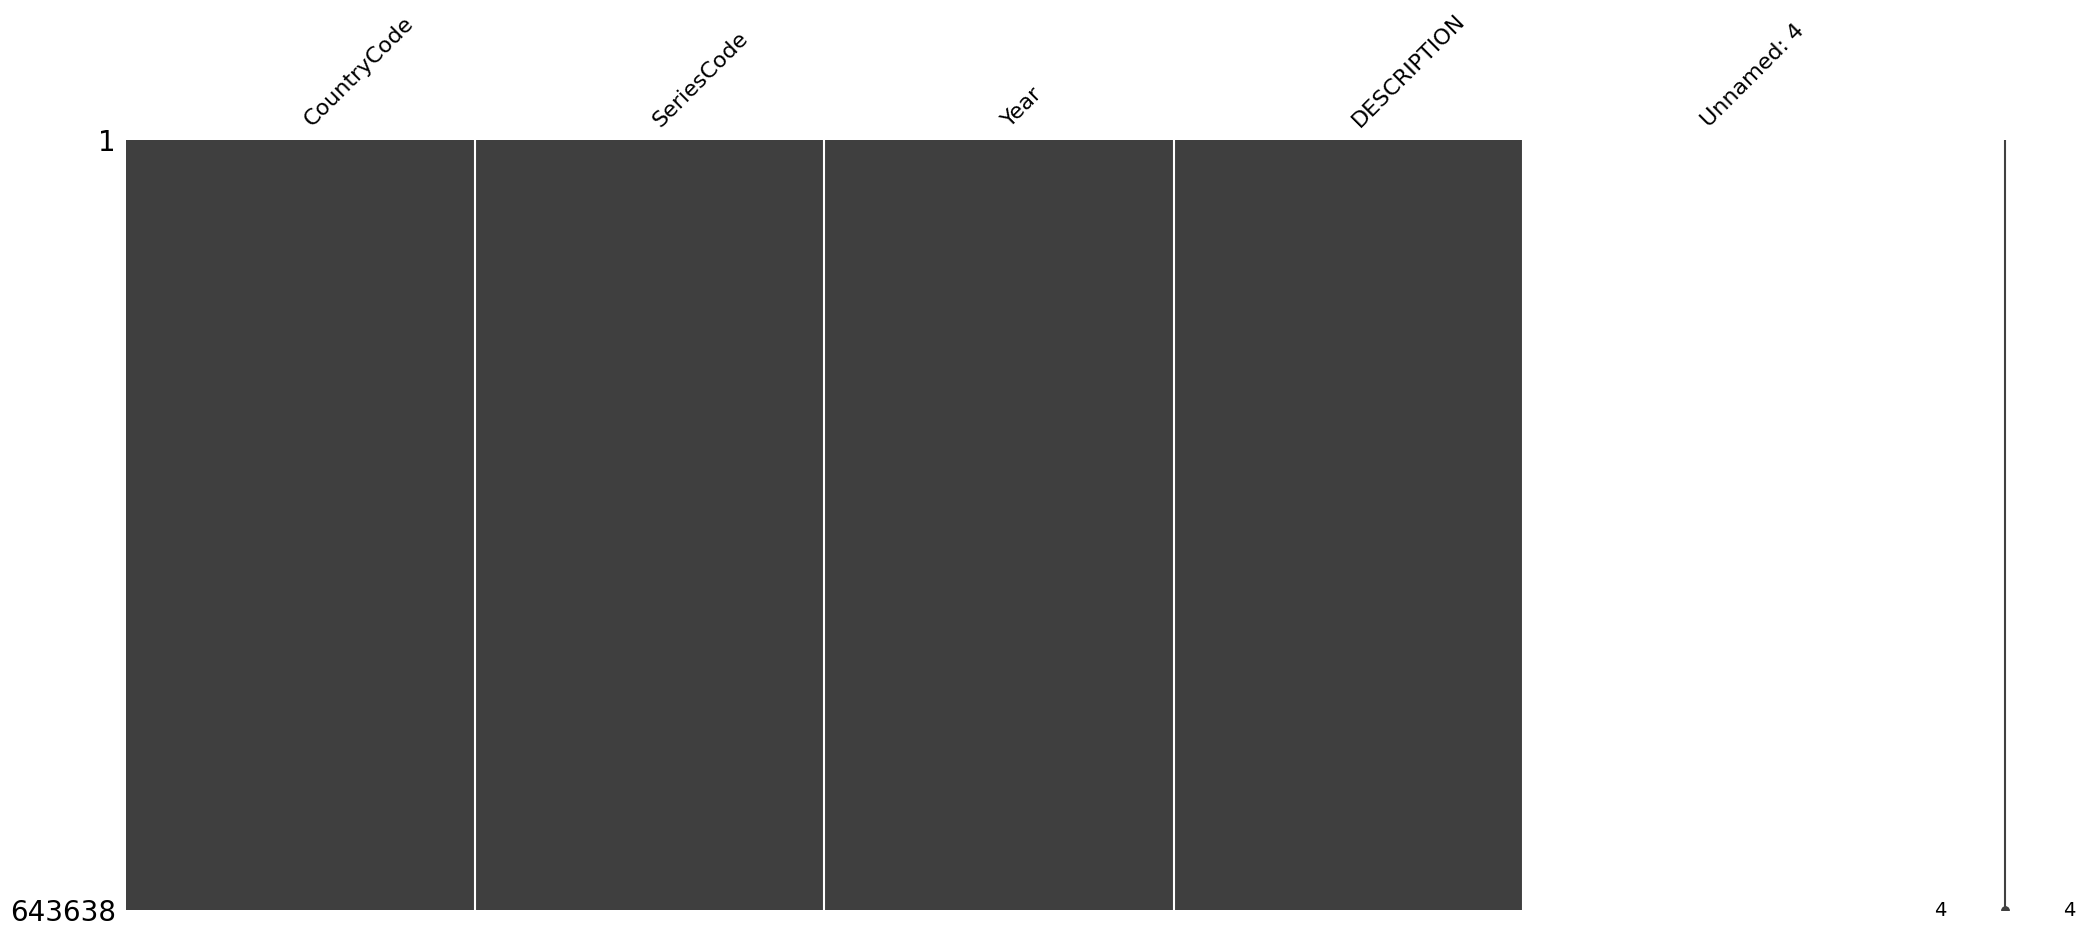

In [37]:
# Matrice des valeurs manquantes
msno.matrix(df_footnote)
plt.show()

## Suppression des colonnes vides pour chaque dataset

In [38]:
#Rappel dimension des datasets
print("Taille Data:", df_data.shape)
print("Taille Country:", df_country.shape)
print("Taille Country-Series:", df_country_series.shape)
print("Taille Series:", df_series.shape)
print("Taille FootNote:", df_footnote.shape)

Taille Data: (886930, 70)
Taille Country: (241, 32)
Taille Country-Series: (613, 4)
Taille Series: (3665, 21)
Taille FootNote: (643638, 5)


In [39]:
# Suppression des colonnes vides pour chaque dataset
df_data = df_data.dropna(axis=1, how='all')
df_country = df_country.dropna(axis=1, how='all')
df_country_series = df_country_series.dropna(axis=1, how='all')
df_series = df_series.dropna(axis=1, how='all')
df_footnote = df_footnote.dropna(axis=1, how='all')

In [40]:
# Contrôle avec .shape()
print("Taille Data après suppression des colonnes vides:", df_data.shape)
print("Taille Country après suppression des colonnes vides:", df_country.shape)
print("Taille Country-Series après suppression des colonnes vides:", df_country_series.shape)
print("Taille Series après suppression des colonnes vides:", df_series.shape)
print("Taille FootNote après suppression des colonnes vides:", df_footnote.shape)  


Taille Data après suppression des colonnes vides: (886930, 69)
Taille Country après suppression des colonnes vides: (241, 31)
Taille Country-Series après suppression des colonnes vides: (613, 3)
Taille Series après suppression des colonnes vides: (3665, 15)
Taille FootNote après suppression des colonnes vides: (643638, 4)


## Vérif des types pour chaque dataset

### Vérif dataset data

In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Vérif des types pour df_data 
df_data_types = df_data.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_data types :")
print(df_data_types)

📊 df_data types :
           colonne     type
0     Country Name   object
1     Country Code   object
2   Indicator Name   object
3   Indicator Code   object
4             1970  float64
5             1971  float64
6             1972  float64
7             1973  float64
8             1974  float64
9             1975  float64
10            1976  float64
11            1977  float64
12            1978  float64
13            1979  float64
14            1980  float64
15            1981  float64
16            1982  float64
17            1983  float64
18            1984  float64
19            1985  float64
20            1986  float64
21            1987  float64
22            1988  float64
23            1989  float64
24            1990  float64
25            1991  float64
26            1992  float64
27            1993  float64
28            1994  float64
29            1995  float64
30            1996  float64
31            1997  float64
32            1998  float64
33            1999  float64
34

In [42]:
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Types cohérents avec les colonnes**

### Vérif dataset country

In [43]:
# Vérif des types pour df_country
df_country_types = df_country.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_country types :")
print(df_country_types)
print("\n")

📊 df_country types :
                                              colonne     type
0                                        Country Code   object
1                                          Short Name   object
2                                          Table Name   object
3                                           Long Name   object
4                                        2-alpha code   object
5                                       Currency Unit   object
6                                       Special Notes   object
7                                              Region   object
8                                        Income Group   object
9                                           WB-2 code   object
10                        National accounts base year   object
11                   National accounts reference year  float64
12                                SNA price valuation   object
13                                   Lending category   object
14                                

In [44]:
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


**⚠️ Anomalies au niveau des années :** 
- Il y a des colonnes avec des années en float (National accounts reference year , Latest industrial data, Latest trade data) et en object (Latest water withdrawal data) or ça devrait être des nombres entiers (int)
- D'autres colonnes comme National accounts base year sont de type "object" avec des valeurs comme "2002/03" ou "Original chained constant price data are" 

### Vérif dataset Country Series

In [45]:
# Vérif des types pour df_country_series
df_country_series_types = df_country_series.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_country_series types :")
print(df_country_series_types)
print("\n")

📊 df_country_series types :
       colonne    type
0  CountryCode  object
1   SeriesCode  object
2  DESCRIPTION  object




In [46]:
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


- **Types cohérents avec les colonnes**

- **⚠️ Il y aura un travail d'harmonisation des noms de colonne (ici 'CountryCode' mais 'Country Code' dans les df Data et Country) + passage en snake case**

- **Idem avec Series Code**

### Vérif dataset Series

In [47]:
# Vérif des types pour df_series
df_series_types = df_series.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_series types :")
print(df_series_types)
print("\n")

📊 df_series types :
                                colonne    type
0                           Series Code  object
1                                 Topic  object
2                        Indicator Name  object
3                      Short definition  object
4                       Long definition  object
5                           Periodicity  object
6                           Base Period  object
7                           Other notes  object
8                    Aggregation method  object
9            Limitations and exceptions  object
10                     General comments  object
11                               Source  object
12  Statistical concept and methodology  object
13                Development relevance  object
14                 Related source links  object




In [48]:
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


- **Types cohérents avec les colonnes**

### Vérif dataset Footnote

In [49]:
# Vérif des types pour df_footnote
df_footnote_types = df_footnote.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_footnote types :")
print(df_footnote_types)

📊 df_footnote types :
       colonne    type
0  CountryCode  object
1   SeriesCode  object
2         Year  object
3  DESCRIPTION  object


In [50]:
df_footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [51]:
df_footnote['Year'].unique()


array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [52]:
len(df_footnote['Year'].unique())

56

- **La colonne Year devrait contenir un int**
- **Préfixe YR à supprimer**

In [53]:
df_footnote = df_footnote.copy()

# mise en majuscules 
df_footnote['Year'] = df_footnote['Year'].str.upper()

# retrait préfixe 'YR'
df_footnote['Year'] = df_footnote['Year'].str.replace('YR', '', regex=False)

# convert des annees en entier 
df_footnote['Year'] = df_footnote['Year'].astype('Int64')

# Vérif des années uniques 
df_footnote['Year'].unique()


<IntegerArray>
[2001, 2005, 2000, 2004, 2006, 2003, 1999, 2008, 2002, 2007, 2017, 2010, 2009,
 2011, 2012, 2015, 2014, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2013, 2016, 2020, 2025, 2030, 2035,
 2040, 2045, 2050]
Length: 55, dtype: Int64

In [54]:
#Contrôle 
print("📊 df_footnote types :")
print(df_footnote.dtypes)

📊 df_footnote types :
CountryCode    object
SeriesCode     object
Year            Int64
DESCRIPTION    object
dtype: object


# Harmonisation des colonnes en snake_case

In [55]:
# Fonction pour transformer les noms de colonnes en snake_case 
def to_snake_case(col):
    col = re.sub(r'[\s\-]+', '_', col)
    col = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', col)
    return col.strip().lower()

dataframes = [df_data, df_country, df_country_series, df_series, df_footnote]
df_names = ['df_data', 'df_country', 'df_country_series', 'df_series', 'df_footnote']

for df, name in zip(dataframes, df_names):
    df.columns = [to_snake_case(col) for col in df.columns]
    print(f"{name} colonnes transformées en snake_case.")


df_data colonnes transformées en snake_case.
df_country colonnes transformées en snake_case.
df_country_series colonnes transformées en snake_case.
df_series colonnes transformées en snake_case.
df_footnote colonnes transformées en snake_case.


In [56]:
#Contrôle
df_country.head(2)

,country_code,short_name,table_name,long_name,2_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,ppp_survey_year,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000


## Filtrage pays sur le df country 


Rappel : nous avons 241 pays alors que l'on en compte 196/197 selon l'ONU.

In [57]:
df_country.describe(include="all")

,country_code,short_name,table_name,long_name,2_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,ppp_survey_year,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data
count,241,241,241,241,238,215,145,214,214,240,205,32.00000,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,107.000000,185.000000,179
unique,241,241,241,241,238,152,131,7,5,240,43,NaN,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,NaN,NaN,20
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,2005,NaN,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000
freq,1,1,1,1,1,23,6,57,55,1,34,NaN,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,NaN,NaN,40
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.53125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.24856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN


In [58]:
# Affichage de la liste des pays 
list_pays = df_country["long_name"].unique()
print("Liste des pays:", list_pays)

Liste des pays: ['Aruba' 'Islamic State of Afghanistan' "People's Republic of Angola"
 'Republic of Albania' 'Principality of Andorra' 'Arab World'
 'United Arab Emirates' 'Argentine Republic' 'Republic of Armenia'
 'American Samoa' 'Antigua and Barbuda' 'Commonwealth of Australia'
 'Republic of Austria' 'Republic of Azerbaijan' 'Republic of Burundi'
 'Kingdom of Belgium' 'Republic of Benin' 'Burkina Faso'
 "People's Republic of Bangladesh" 'Republic of Bulgaria'
 'Kingdom of Bahrain' 'Commonwealth of The Bahamas'
 'Bosnia and Herzegovina' 'Republic of Belarus' 'Belize' 'The Bermudas'
 'Plurinational State of Bolivia' 'Federative Republic of Brazil'
 'Barbados' 'Brunei Darussalam' 'Kingdom of Bhutan' 'Republic of Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Channel Islands'
 'Republic of Chile' "People's Republic of China"
 "Republic of Côte d'Ivoire" 'Republic of Cameroon'
 'Democratic Republic of the Congo' 'Republic of Congo'
 'Republic of Colombia' 'Union of the Co

In [59]:
# Récupération de la liste des noms de pays via PyCountry 
valid_countries = {c.name for c in pycountry.countries}
valid_countries.update({c.official_name for c in pycountry.countries if hasattr(c, "official_name")})
valid_alpha2_codes = {c.alpha_2 for c in pycountry.countries}

# Fonction pour vérifier si au moins un des deux noms (short ou long) ou le code pays est reconnu
def is_valid_country(row):
    return (
        row["short_name"] in valid_countries
        or row["long_name"] in valid_countries
        or row["country_code"] in valid_alpha2_codes
    )

#Ajout d'une colonne is_country pour indiquer si le pays est valide
df_country["is_country"] = df_country.apply(is_valid_country, axis=1) 

# Filtrage des faux pays avec creation dataframe invalid_rows
invalid_rows = df_country[~df_country["is_country"]] #Récupération des lignes où is_country est False 
print("Nombre de faux pays:", len(invalid_rows)) #Affiche du nombre de faux pays 



Nombre de faux pays: 45


In [60]:
# Print de la liste des faux pays 
print("Liste des faux pays:")
print("\n") 
print(invalid_rows.short_name.unique())


Liste des faux pays:


['Arab World' 'The Bahamas' 'Channel Islands' 'Dem. Rep. Congo'
 'East Asia & Pacific (developing only)'
 'East Asia & Pacific (all income levels)'
 'Europe & Central Asia (developing only)'
 'Europe & Central Asia (all income levels)' 'Euro area' 'European Union'
 'Faeroe Islands' 'The Gambia' 'High income' 'Hong Kong SAR, China'
 'Heavily indebted poor countries (HIPC)' 'St. Kitts and Nevis' 'Korea'
 'Latin America & Caribbean (developing only)' 'St. Lucia'
 'Latin America & Caribbean (all income levels)'
 'Least developed countries: UN classification' 'Low income'
 'Lower middle income' 'Low & middle income' 'Macao SAR, China'
 'St. Martin (French part)'
 'Middle East & North Africa (all income levels)' 'Middle income'
 'Macedonia' 'Middle East & North Africa (developing only)'
 'North America' 'OECD members' 'West Bank and Gaza' 'South Asia'
 'Sub-Saharan Africa (developing only)'
 'Sub-Saharan Africa (all income levels)' 'São Tomé and Principe'
 'Swaziland' 

In [61]:
# Nbre pays avant filtrage
print("Nbre de pays avant filtrage:")
print(len(df_country.short_name.unique()))

# Filtrage des pays valides et reset de l'index sur le dataframe df_country
df_country = df_country[df_country["is_country"]].reset_index(drop=True)

# Nbre pays après filtrage > df_country nettoyé 
print("Nbre de pays avant filtrage:")
print(len(df_country.short_name.unique()))

Nbre de pays avant filtrage:
241
Nbre de pays avant filtrage:
196


### Filtrage des valeurs indésirables du dataset data (méthode filtrage avec liste)

In [62]:
invalid_rows.head(3)

,country_code,short_name,table_name,long_name,2_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,ppp_survey_year,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data,is_country
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
21,BHS,The Bahamas,"Bahamas, The",Commonwealth of The Bahamas,BS,Bahamian dollar,NaN,Latin America & Caribbean,High income: nonOECD,BS,2006,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,NaN,NaN,2012.0,NaN,False
35,CHI,Channel Islands,Channel Islands,Channel Islands,NaN,Pound sterling,NaN,Europe & Central Asia,High income: nonOECD,JG,2003,2007.0,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guernsey: 2009; Jersey: 2011.,NaN,NaN,Yes. Vital registration for Guernsey and Jersey.,NaN,NaN,NaN,NaN,False


In [63]:
#Création listes des pays invalides (short_name et country_code) 
liste_invalid_country = invalid_rows.short_name.to_list() 
country_codes_invalid = invalid_rows.country_code.to_list()

# Affichage des pays invalides et nbre de pays invalides
print("Liste des pays invalides:", liste_invalid_country)
print("Nbre de pays invalides:", len(liste_invalid_country))

Liste des pays invalides: ['Arab World', 'The Bahamas', 'Channel Islands', 'Dem. Rep. Congo', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Euro area', 'European Union', 'Faeroe Islands', 'The Gambia', 'High income', 'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)', 'St. Kitts and Nevis', 'Korea', 'Latin America & Caribbean (developing only)', 'St. Lucia', 'Latin America & Caribbean (all income levels)', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income', 'Macao SAR, China', 'St. Martin (French part)', 'Middle East & North Africa (all income levels)', 'Middle income', 'Macedonia', 'Middle East & North Africa (developing only)', 'North America', 'OECD members', 'West Bank and Gaza', 'South Asia', 'Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa (all income levels)', 'São Tomé and 

In [64]:
# Stats avant
initial_rows = df_data.shape[0] 

#Filtrage des valeurs indésirables sur le dataset data 
df_data = df_data[~df_data['country_code'].isin(country_codes_invalid)] 

# Stats après
final_rows = df_data.shape[0]
removed = initial_rows - final_rows #nbre de lignes supprimées 
percent = round((removed / initial_rows) * 100, 2) #calcul du pourcentage de lignes supprimées 

#Print les stats de filtrage 
print(f"✔️ {removed} lignes supprimées ({percent}%)")
print(f"🧮 Nouveau shape de data : {df_data.shape}")


✔️ 164925 lignes supprimées (18.6%)
🧮 Nouveau shape de data : (722005, 69)


In [65]:
df_data.head(3)

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.05987,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.22310,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37913,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtrage des valeurs indésirables sur les datasets Country Series et Footnote (méthode filtrage avec inner join)

In [66]:
# Filtrage avec inner join pour country_series et footnote
initial_rows = df_country_series.shape[0] # Stats avant
df_country_series = df_country_series.merge(df_country[["country_code"]], how="inner", on="country_code") # Filtrage avec inner join pour country_series

final_rows = df_country_series.shape[0] # Stats après
removed = initial_rows - final_rows
percent = round((removed / initial_rows) * 100, 2)

# Print
print(f"✔️ {removed} lignes supprimées ({percent}%)")
print(f"🧮 Nouveau shape de data : {df_country_series.shape}")

✔️ 53 lignes supprimées (8.65%)
🧮 Nouveau shape de data : (560, 3)


In [67]:
# Filtrage avec inner join pour footnote
initial_rows = df_footnote.shape[0] # Stats avant

df_footnote = df_footnote.merge(df_country[["country_code"]], how="inner", on="country_code") # Filtrage avec inner join pour footnote

final_rows = df_footnote.shape[0] # Stats après
removed = initial_rows - final_rows
percent = round((removed / initial_rows) * 100, 2)

# Print
print(f"✔️ {removed} lignes supprimées ({percent}%)")
print(f"🧮 Nouveau shape de data : {df_footnote.shape}")

✔️ 167534 lignes supprimées (26.03%)
🧮 Nouveau shape de data : (476104, 4)


# Partie 2

In [68]:
# Afficher la taille de chaque dataset
print("Taille Data:", df_data.shape)
print("Taille Country:", df_country.shape)
print("Taille Country-Series:", df_country_series.shape)
print("Taille Series:", df_series.shape)
print("Taille FootNote:", df_footnote.shape)

Taille Data: (722005, 69)
Taille Country: (196, 32)
Taille Country-Series: (560, 3)
Taille Series: (3665, 15)
Taille FootNote: (476104, 4)


## Identification de la colonne métier

In [69]:
df_series.head(5)

,series_code,topic,indicator_name,short_definition,long_definition,periodicity,base_period,other_notes,aggregation_method,limitations_and_exceptions,general_comments,source,statistical_concept_and_methodology,development_relevance,related_source_links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


**La colonne métier est 'topic'**

In [70]:
# Identification de la colonne métier à laquelle appartient chaque indicateur
df_series.topic.value_counts()

topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                  

In [71]:
#Liste des catégories retenues  
selection_cat = [
    "Learning Outcomes",
    "Attainment",
    "Education Equality",
    "Secondary",
    "Primary",
    "Tertiary",
    "Post-Secondary/Non-Tertiary",
    "Pre-Primary",
    "Early Childhood Education",
    "Early Child Development (SABER)",
    "Population",
    "Health: Population: Structure",
    "Literacy",
    "Teachers",
    "Expenditures",
    "School Finance (SABER)",
    "School Autonomy and Accountability (SABER)",
    "EMIS", # Education Management Information System 
    "Student Assessment (SABER)",
    "Engaging the Private Sector (SABER)",
    "Infrastructure: Communications"
]


In [72]:
# Nbre de catégories retenues
print("Nombre de catégories retenues:", len(selection_cat))

Nombre de catégories retenues: 21


In [73]:
# Avant filtrage
print("Nombre de lignes AVANT filtrage :", df_series.shape[0])

# Filtrage sur les catégories métier sélectionnées
df_series = df_series[df_series["topic"].isin(selection_cat)]

# Après filtrage
print("Nombre de lignes APRÈS filtrage :", df_series.shape[0])
print(f"Lignes supprimées : {3665 - df_series.shape[0]}")


Nombre de lignes AVANT filtrage : 3665
Nombre de lignes APRÈS filtrage : 3541
Lignes supprimées : 124


In [74]:
# Nombre d'indicateurs uniques 
df_series["series_code"].nunique() 

3541

In [75]:
# Nombre d'indicateurs uniques par nom 
df_series["indicator_name"].nunique() 

3541

**- 3541 indicateurs restants dans 21 catégories métier**

**- Un indicateur correspond bien à un code.**

### Harmonisation des noms de colonne

In [76]:
# Harmonisation des colonnes
df_series = df_series.copy()  # Créer une copie pour éviter le warning 
df_series.rename(columns={
    "series_code": "indicator_code"
}, inplace=True)

In [77]:
df_series.head(3)

,indicator_code,topic,indicator_name,short_definition,long_definition,periodicity,base_period,other_notes,aggregation_method,limitations_and_exceptions,general_comments,source,statistical_concept_and_methodology,development_relevance,related_source_links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


In [78]:
df_country.head(3)

,country_code,short_name,table_name,long_name,2_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,ppp_survey_year,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data,is_country
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,True
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,True
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,True


### Filtrage sur les autres datasets

In [79]:
df_series.head()


,indicator_code,topic,indicator_name,short_definition,long_definition,periodicity,base_period,other_notes,aggregation_method,limitations_and_exceptions,general_comments,source,statistical_concept_and_methodology,development_relevance,related_source_links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


In [80]:
# Création d'une liste des codes des indicateurs 
indicator_codes = df_series["indicator_code"].unique().tolist()

### Filtrage sur df_data

In [81]:
# Avant filtrage
print(f"✔️ Shape avant filtrage : {df_data.shape}")

# Filtrage sur les indicateurs sélectionnés
df_data = df_data[df_data["indicator_code"].isin(indicator_codes)]

# Après filtrage
print(f"✔️ Shape après filtrage : {df_data.shape}")


✔️ Shape avant filtrage : (722005, 69)
✔️ Shape après filtrage : (687333, 69)


### Filtrage sur df_footnote

In [82]:
df_footnote.head(3)

,country_code,series_code,year,description
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.


In [83]:
# Avant filtrage
print(f"✔️ Shape avant filtrage : {df_footnote.shape}")

# Filtrage sur les indicateurs sélectionnés
df_footnote = df_footnote[df_footnote["series_code"].isin(indicator_codes)]

# Après filtrage
print(f"✔️ Shape après filtrage : {df_footnote.shape}")


✔️ Shape avant filtrage : (476104, 4)
✔️ Shape après filtrage : (445285, 4)


### Filtrage sur country_series 

In [84]:
df_country_series.head(3)

,country_code,series_code,description
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...


In [85]:
# Avant filtrage
print(f"✔️ Shape avant filtrage : {df_country_series.shape}")

# Filtrage sur les indicateurs sélectionnés
df_country_series = df_country_series[df_country_series["series_code"].isin(indicator_codes)]

# Après filtrage
print(f"✔️ Shape après filtrage : {df_country_series.shape}")


✔️ Shape avant filtrage : (560, 3)
✔️ Shape après filtrage : (260, 3)


### Interprétation des colonnes années dans df_data


In [86]:
df_data.describe(include="all")

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,687333,687333,687333,687333,6.247200e+04,2.728000e+04,2.717600e+04,2.731900e+04,2.735400e+04,7.570300e+04,2.858900e+04,2.859200e+04,2.887000e+04,2.801100e+04,7.670300e+04,2.955100e+04,2.831900e+04,2.905500e+04,2.880000e+04,7.722700e+04,2.939100e+04,2.870600e+04,2.868900e+04,2.792000e+04,1.066270e+05,5.913000e+04,5.941800e+04,5.938300e+04,6.131300e+04,1.114420e+05,6.034900e+04,5.630200e+04,6.580000e+04,9.441900e+04,1.483520e+05,9.842600e+04,9.819000e+04,1.038900e+05,1.019950e+05,1.543230e+05,1.135310e+05,1.095540e+05,1.071930e+05,1.137870e+05,2.052040e+05,1.172320e+05,1.184550e+05,1.088310e+05,8.914000e+04,1.122500e+05,9.601000e+03,0.0,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000
unique,197,197,3489,3489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3489,3489,197,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.901915e+05,7.177894e+05,7.318345e+05,7.414668e+05,7.604131e+05,2.796706e+05,7.605455e+05,7.754220e+05,7.853187e+05,8.160084e+05,3.082063e+05,8.348811e+05,8.665527e+05,8.542476e+05,8.760881e+05,3.306737e+05,8.914367e+05,9.270343e+05,9.399986e+05,9.745078e+05,6.868368e+05,1.257724e+06,1.250968e+06,1.274554e+06,1.253369e+06,6.973038e+05,1.300672e+06,1.403774e+06,1.230901e+06,8.991079e+05,5.794249e+05,8.933723e+05,8.973454e+05,8.551457e+05,8.667381e+05,5.764109e+05,7.982705e+05,8.331161e+05,8.557652e+05,8.112434e+05,4.489162e+05,7.979813e+05,7.838495e+05,8.698734e+05,9.931735e+05,7.828843e+05,3.221550e+06,NaN,300.340463,314.236829,327.318015,339.281736,348.907182,356.793083,363.198476,368.422466,372.312687,374.514884,374.986261,373.971894,371.911620,369.202511,365.863946,361.767135,356.882707
std,NaN,NaN,NaN,NaN,6.406624e+06,9.941718e+06,1.019152e+07,1.039499e+07,1.061556e+07,6.518275e+06,1.078533e+07,1.098291e+07,1.112871e+07,1.148455e+07,7.072685e+06,1.163236e+07,1.203174e+07,1.208064e+07,1.233731e+07,7.672294e+06,1.263728e+07,1.301208e+07,1.324165e+07,1.364615e+07,8.175810e+06,1.111025e+07,1.116322e+07,1.131591e+07,1.128681e+07,8.507486e+06,1.168740e+07,1.226388e+07,1.154593e+07,9.789404e+06,7.920372e+06,9.865610e+06,9.945847e+06,9.775380e+06,9.922221e+06,8.147094e+06,9.621468e+06,9.841662e+06,1.001615e+07,9.804391e+06,7.355135e+06,9.808589e+06,9.781894e+06,1.027839e+07,1.136993e+07,1.016228e+07,3.136739e+07,NaN,4795.397213,5002.417776,5185.664004,5353.773738,5502.637784,5637.764593,5768.061721,5891.482607,6004.984228,6104.909985,6191.882737,6260.380099,6311.031882,6347.432261,6367.505136,6366.476591,6344.885260
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

- **2017 est une année vide**
- **A partir de 2020, le même nombre de lignes sont remplies avec des projections puisque le dataset est de 2017** 

# Calculs proportions

### Calcul proportion des années par indicateur

In [87]:
# colonnes années
annee_cols = [col for col in df_data.columns if col.isdigit()] #récuparation des colonnes d'années 

# passer en un long format avec 4 colonnes : indicator_name, country_name, year, value 
long = df_data.melt(
    id_vars=["indicator_name", "country_name"], 
    value_vars=annee_cols,
    var_name="year",
    value_name="value" 
)

# proportion d’indicateurs qui ont au moins une valeur (dans n'importe quel pays)
year_indicator_coverage = ( 
    long.groupby(["year", "indicator_name"])["value"] 
        .apply(lambda s: s.notna().any()) 
        .reset_index(name="has_value")
)

prop_indicateurs_par_annee = (
    year_indicator_coverage.groupby("year")["has_value"]
        .mean() #taux de True 
        .mul(100) # pourcentage
        .round(1) # arrondi à 1 décimale
        .sort_index() # tri par année croissante 
        .rename("pct_indicators_filled") # renommage de la colonne 
        .reset_index()
)

### Calcul proportion des indicateurs par année 

In [88]:
# 2. Pour chaque indicateur : proportion d’années avec au moins une valeur renseignée
prop_annees_par_indicateur = (
    year_indicator_coverage.groupby("indicator_name")["has_value"]
        .mean() 
        .mul(100)
        .round(1)
        .sort_values(ascending=False)
        .rename("pct_years_filled")
        .reset_index()
)

In [89]:
# Voir les indicateurs les plus/moins remplis 
print(prop_indicateurs_par_annee.head(10))
print(prop_indicateurs_par_annee.tail(10))

   year  pct_indicators_filled
0  1970                   22.6
1  1971                   11.7
2  1972                   11.7
3  1973                   11.6
4  1974                   11.7
5  1975                   22.6
6  1976                   12.4
7  1977                   12.3
8  1978                   12.2
9  1979                   12.2
    year  pct_indicators_filled
55  2055                    8.8
56  2060                    8.8
57  2065                    8.8
58  2070                    8.8
59  2075                    8.8
60  2080                    8.8
61  2085                    8.8
62  2090                    8.8
63  2095                    8.8
64  2100                    8.8


In [90]:
# Voir les années les plus/moins remplies
print(prop_annees_par_indicateur.head(10))
print(prop_annees_par_indicateur.tail(10))

                                      indicator_name  pct_years_filled
0  Percentage of students in secondary general ed...              72.3
1  Population of the official entrance age to pri...              72.3
2    Lower secondary completion rate, both sexes (%)              72.3
3        Lower secondary completion rate, female (%)              72.3
4  Population of the official age for upper secon...              72.3
5          Lower secondary completion rate, male (%)              72.3
6  Population of the official age for upper secon...              72.3
7  Population of the official entrance age to pri...              72.3
8  Population of the official entrance age to pri...              72.3
9  Population of the official age for upper secon...              72.3
                                         indicator_name  pct_years_filled
3479  SABER: (Engaging the Private Sector, Governmen...               1.5
3480  Africa Dataset: Teacher attrition rate from pu...               1

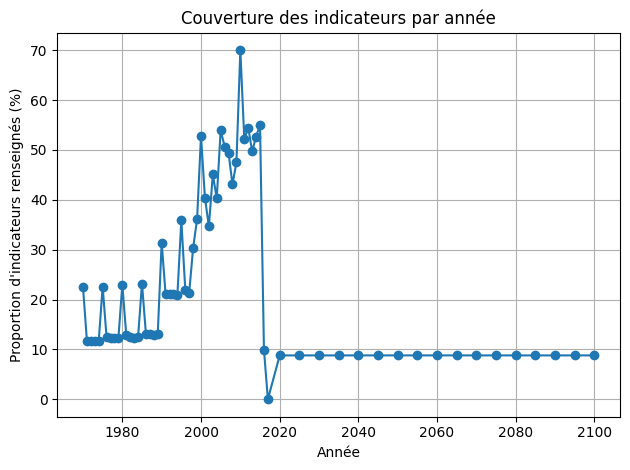

In [91]:
#Visualisation % d'indicateurs couverts par année 
fig, ax = plt.subplots()
ax.plot(
    prop_indicateurs_par_annee["year"].astype(int),
    prop_indicateurs_par_annee["pct_indicators_filled"],
    marker="o"
)
ax.set_xlabel("Année")
ax.set_ylabel("Proportion d'indicateurs renseignés (%)")
ax.set_title("Couverture des indicateurs par année")
ax.grid(True)
plt.tight_layout()
plt.show()

## Filtrage temporel


Pour garder une fenêtre de données fiable et dense, je vais supprimer :

Les années avant 2005 (faible couverture et trop anciennes pour une expansion moderne),

2017 (0 % des indicateurs renseignés)

Les années à partir de 2030 (projections, donc moins fiables que les données historiques).

In [92]:
# Confirmer que 2017 n'a pas de données
row2017 = prop_indicateurs_par_annee.loc[
    prop_indicateurs_par_annee["year"] == "2017", "pct_indicators_filled"
]

if not row2017.empty:
    print("2017 :", row2017.iloc[0], "% d'indicateurs couverts")
else:
    print("2017 n'est pas dans le dataframe (peut-être déjà supprimée ou mal formatée).")

2017 : 0.0 % d'indicateurs couverts


In [93]:
# colonnes années d'origine
annee_cols_full = [col for col in df_data.columns if col.isdigit()]

# définir celles à dropper
years_to_drop = [str(y) for y in range(1970, 2005)] + ["2017"] + [str(y) for y in range(2030, 2101)] #années à supprimer (1970 à 2004 + 2017 + 2030 à 2100) 
to_drop = [y for y in years_to_drop if y in df_data.columns]

print("Nombre de colonnes total avant :", df_data.shape[1])
print("Années qui vont être supprimées :", to_drop)

# trimming
df_trimmed = df_data.drop(columns=to_drop).copy()

# colonnes années après trimming 
annee_cols_trimmed = [col for col in df_trimmed.columns if col.isdigit()]

print("Nombre de colonnes total après :", df_trimmed.shape[1])
print("Nombre d'années restantes :", len(annee_cols_trimmed))
print("Années conservées :", sorted(annee_cols_trimmed)) 


Nombre de colonnes total avant : 69
Années qui vont être supprimées : ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2017', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
Nombre de colonnes total après : 18
Nombre d'années restantes : 14
Années conservées : ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2020', '2025']


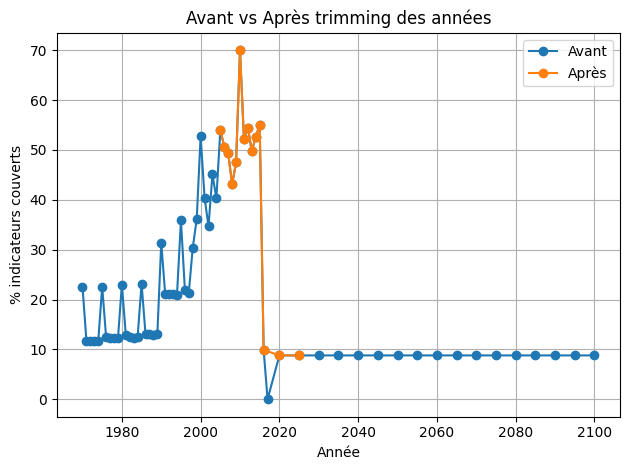

In [94]:
def get_pct_indicators_by_year(df):
    year_cols = [c for c in df.columns if c.isdigit()]
    long = df.melt(
        id_vars=["indicator_name", "country_name"],
        value_vars=year_cols,
        var_name="year",
        value_name="value"
    )
    coverage = (
        long.groupby(["year", "indicator_name"])["value"]
            .apply(lambda s: s.notna().any())
            .reset_index(name="has_value")
    )
    return (
        coverage.groupby("year")["has_value"]
            .mean().mul(100).round(1)
            .sort_index()
            .rename("pct_indicators_filled")
            .reset_index()
    )

after = get_pct_indicators_by_year(df_trimmed)

# plot comparison 
before = prop_indicateurs_par_annee.copy()
before["year"] = before["year"].astype(int)
after["year"] = after["year"].astype(int)

fig, ax = plt.subplots()
ax.plot(before["year"], before["pct_indicators_filled"], marker="o", label="Avant")
ax.plot(after["year"], after["pct_indicators_filled"], marker="o", label="Après")
ax.set_xlabel("Année")
ax.set_ylabel("% indicateurs couverts")
ax.set_title("Avant vs Après trimming des années") 
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


## Filtrage indicateur

In [95]:

annee_cols = [c for c in df_trimmed.columns if c.isdigit()]

long_trimmed = df_trimmed.melt(
    id_vars=["indicator_name", "country_name"],
    value_vars=annee_cols,
    var_name="year",
    value_name="value"
)

# nombre de pays avec valeur par indicateur × année 
country_counts = (
    long_trimmed[long_trimmed["value"].notna()]
      .groupby(["indicator_name", "year"])["country_name"]
      .nunique()
      .reset_index(name="n_countries_with_value")
)

# check : quelles années sont encore présentes 
print("Années dans country_counts :", sorted(country_counts["year"].unique()))


Années dans country_counts : ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2020', '2025']


In [96]:
country_counts.head()


,indicator_name,year,n_countries_with_value
0,"Adjusted net enrolment rate, lower secondary, ...",2005,92
1,"Adjusted net enrolment rate, lower secondary, ...",2006,88
2,"Adjusted net enrolment rate, lower secondary, ...",2007,92
3,"Adjusted net enrolment rate, lower secondary, ...",2008,90
4,"Adjusted net enrolment rate, lower secondary, ...",2009,99


In [97]:
top_indicator_year = country_counts.sort_values("n_countries_with_value", ascending=False)
top_indicator_year.indicator_name.nunique()

3476

In [98]:
# résumé par indicateur : médiane et somme de pays couverts sur les années réelles
summary_real = (
    country_counts.groupby("indicator_name")["n_countries_with_value"]
      .agg(
          median_countries_covered=("median"), 
          total_countries_coverage=("sum"), 
          n_years_present=("count")
      )
      .reset_index()
      .sort_values("total_countries_coverage", ascending=False)
)


In [99]:
summary_real.indicator_name.nunique()

3476

In [100]:
top100 = summary_real.head(100).copy()
candidates = top100["indicator_name"].tolist()
display(candidates)

['Population, total',
 'Official entrance age to primary education (years)',
 'Theoretical duration of primary education (years)',
 'Official entrance age to lower secondary education (years)',
 'Theoretical duration of upper secondary education (years)',
 'Theoretical duration of secondary education (years)',
 'Internet users (per 100 people)',
 'Population, ages 15-64 (% of total)',
 'Population, ages 0-14, male',
 'Population, ages 0-14 (% of total)',
 'Population, ages 0-14, female',
 'Population, ages 15-64, female',
 'Population, ages 15-64, male',
 'Population, ages 15-64, total',
 'Population, female',
 'Population, female (% of total)',
 'Population, male',
 'Population, male (% of total)',
 'Population, ages 0-14, total',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population of the official age for lower secondary education, both sexes (number)',
 'Population of the official age for secondary education, both sexes (number)',
 'Popu

In [101]:
# liste des 15 indicateurs retenus
selected_indicators = [
    "Population, total",
    "Population, ages 15-64 (% of total)",
    "Population, ages 0-14, total",
    "Internet users (per 100 people)",
    "Official entrance age to primary education (years)",
    "Official entrance age to lower secondary education (years)",
    "Theoretical duration of primary education (years)",
    "Theoretical duration of secondary education (years)",
    "Theoretical duration of upper secondary education (years)",
    "Population of the official age for secondary education, both sexes (number)",
    "Population of the official age for upper secondary education, both sexes (number)",
    "Population of the official entrance age to primary education, both sexes (number)",
    "Population of the official age for lower secondary education, both sexes (number)",
    "Population, ages 12-18, total",
    "Population, female (% of total)",
]


In [102]:
# profondeur réelle : nb d'années (≤2017) avec data par country+indicator
long_trimmed["year_int"] = long_trimmed["year"].astype(int)

# profondeur réelle : nombre d'années (≤2017) avec data par country+indicator
depth = (
    long_trimmed[
        (long_trimmed["year_int"] <= 2017) &
        (long_trimmed["indicator_name"].isin(selected_indicators)) &
        (long_trimmed["value"].notna())
    ]
    .groupby(["country_name", "indicator_name"])["year_int"]
    .nunique()
    .reset_index(name="n_years_with_data")
)


# seuil : au moins 2 années de données réelles
min_years = 2
good_pairs = depth[depth["n_years_with_data"] >= min_years][["country_name", "indicator_name"]]

# restreindre le dataset pondéré à ces couples fiables
filtered = long_trimmed[long_trimmed["indicator_name"].isin(selected_indicators)].copy()
filtered = filtered.merge(good_pairs, on=["country_name", "indicator_name"], how="inner")

# ensuite faire la moyenne pondérée comme avant
filtered["weight"] = np.where(filtered["year_int"] <= 2017, 1.0, 0.5)
filtered["prod"] = filtered["value"] * filtered["weight"]
agg = (
    filtered.groupby(["country_name", "indicator_name"])
    .agg(total_prod=("prod", "sum"), total_weight=("weight", "sum"))
    .assign(weighted_value=lambda df: df["total_prod"] / df["total_weight"])
    .reset_index()[["country_name", "indicator_name", "weighted_value"]]
)
df_country_indicator = agg.pivot(index="country_name", columns="indicator_name", values="weighted_value").reset_index()
df_country_indicator.columns.name = None


In [103]:
# combien de couples pays×indicateur conservés
print("Couples pays-indicateur retenus :", agg.shape[0])

# couverture par pays : combien d'indicateurs restent
coverage_per_country = df_country_indicator.drop(columns=["country_name"]).notna().sum(axis=1)
print("Statistiques coverage par pays :", coverage_per_country.describe())

# coverage par indicateur : combien de pays restent
coverage_per_indicator = df_country_indicator.set_index("country_name").notna().sum(axis=0)
print("Statistiques coverage par indicateur :", coverage_per_indicator.describe())


Couples pays-indicateur retenus : 2761
Statistiques coverage par pays : count    197.000000
mean      14.015228
std        2.728304
min        1.000000
25%       15.000000
50%       15.000000
75%       15.000000
max       15.000000
dtype: float64
Statistiques coverage par indicateur : count     15.000000
mean     184.066667
std        6.745016
min      172.000000
25%      178.500000
50%      181.000000
75%      189.000000
max      195.000000
dtype: float64


## Filtrage pays trop creux (conservation des ≥10 indicateurs fiables) :


In [104]:
# Suppression des pays avec moins de 10 indicateurs 
###coverage_per_country = df_country_indicator.drop(columns=["country_name"]).notna().sum(axis=1)
df_scored = df_country_indicator[coverage_per_country >= 10].copy()
df_scored.shape

(181, 16)

# Partie 3 

In [105]:
display(df_scored.head(10))

,country_name,Internet users (per 100 people),Official entrance age to lower secondary education (years),Official entrance age to primary education (years),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to primary education, both sexes (number)","Population, ages 0-14, total","Population, ages 12-18, total","Population, ages 15-64 (% of total)","Population, female (% of total)","Population, total",Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years)
0,Afghanistan,4.371657,11.000000,5.923077,1.776909e+06,3.343494e+06,1.566585e+06,832421.076923,1.271864e+07,4.239293e+06,47.031429,44.755633,2.730541e+07,5.076923,5.076923,2.538462
1,Albania,37.794026,9.846154,5.538462,1.998855e+05,3.829472e+05,1.830616e+05,36999.384615,5.912715e+05,3.408505e+05,62.195869,45.918636,2.700654e+06,4.307692,6.769231,3.076923
2,Algeria,17.140511,9.615385,5.076923,2.101339e+06,3.909509e+06,1.808170e+06,587628.538462,9.494377e+06,3.934370e+06,61.384637,45.690200,3.385580e+07,4.538462,5.769231,2.538462
5,Angola,5.034105,10.769231,5.538462,1.569013e+06,2.895362e+06,1.326349e+06,655393.615385,1.044597e+07,2.553253e+06,46.531753,47.132066,2.210746e+07,5.230769,5.692308,2.769231
6,Antigua and Barbuda,46.321538,11.076923,4.615385,4.339538e+03,7.181923e+03,2.842385e+03,1391.615385,2.310938e+04,1.552769e+03,61.822344,48.033825,8.782585e+04,6.461538,4.615385,1.846154
7,Argentina,41.638528,11.076923,5.538462,1.930264e+06,3.839761e+06,1.909497e+06,661912.538462,9.903767e+06,4.067844e+06,58.706082,47.150993,3.827850e+07,5.538462,5.538462,2.769231
8,Armenia,26.964708,9.230769,6.000000,1.202447e+05,1.811047e+05,1.052518e+05,14756.461538,5.373242e+05,2.814405e+05,63.516287,49.004633,2.688148e+06,3.230769,6.846154,2.230769
9,Aruba,57.244899,11.076923,5.538462,2.797692e+03,6.968385e+03,4.170692e+03,1276.076923,1.909915e+04,8.672846e+03,63.950635,48.374925,9.441023e+04,5.538462,4.615385,2.769231
10,Australia,70.700798,11.076923,4.615385,1.049981e+06,1.591746e+06,5.417654e+05,237488.538462,3.918232e+06,1.654523e+06,61.904815,46.217329,2.049660e+07,6.461538,5.538462,1.846154
11,Austria,69.316007,9.230769,5.538462,3.291326e+05,6.830062e+05,3.538735e+05,74729.384615,1.149901e+06,5.536097e+05,62.234087,47.283499,7.772561e+06,3.692308,7.384615,3.692308


In [106]:
# garder seulement les indicateurs numériques (sans country_name)
df_correlation = df_scored 
indicator_cols = [c for c in df_correlation.columns if c != "country_name"]

# Pearson
corr_pearson = df_correlation[indicator_cols].corr(method="pearson")
print(corr_pearson)

                                                    Internet users (per 100 people)  \
Internet users (per 100 people)                                            1.000000   
Official entrance age to lower secondary educat...                        -0.046751   
Official entrance age to primary education (years)                        -0.073372   
Population of the official age for lower second...                        -0.083001   
Population of the official age for secondary ed...                        -0.077728   
Population of the official age for upper second...                        -0.073063   
Population of the official entrance age to prim...                        -0.103019   
Population, ages 0-14, total                                              -0.100959   
Population, ages 12-18, total                                             -0.074732   
Population, ages 15-64 (% of total)                                        0.661081   
Population, female (% of total)            

In [107]:
#Spearman
corr_spearman = df_correlation[indicator_cols].corr(method="spearman")

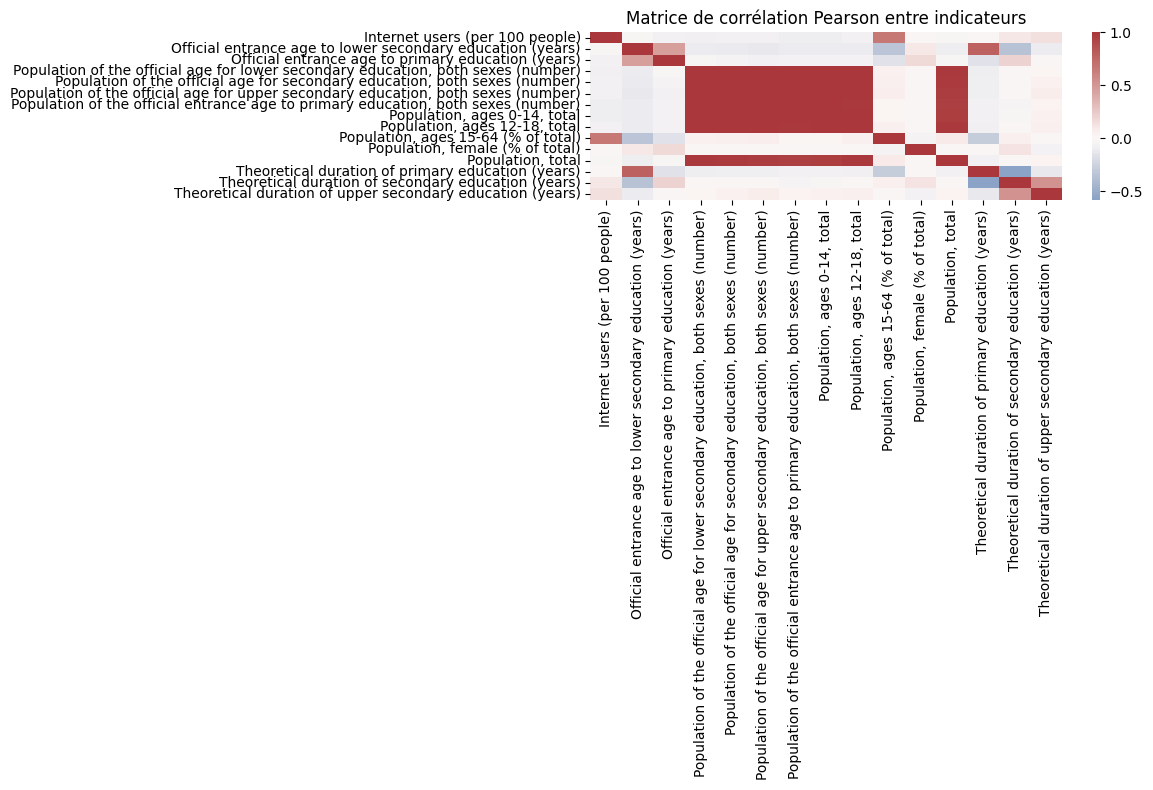

In [108]:
# heatmap Pearson
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_pearson, annot=False, cmap="vlag", center=0, ax=ax)
ax.set_title("Matrice de corrélation Pearson entre indicateurs")
plt.tight_layout()
plt.show()

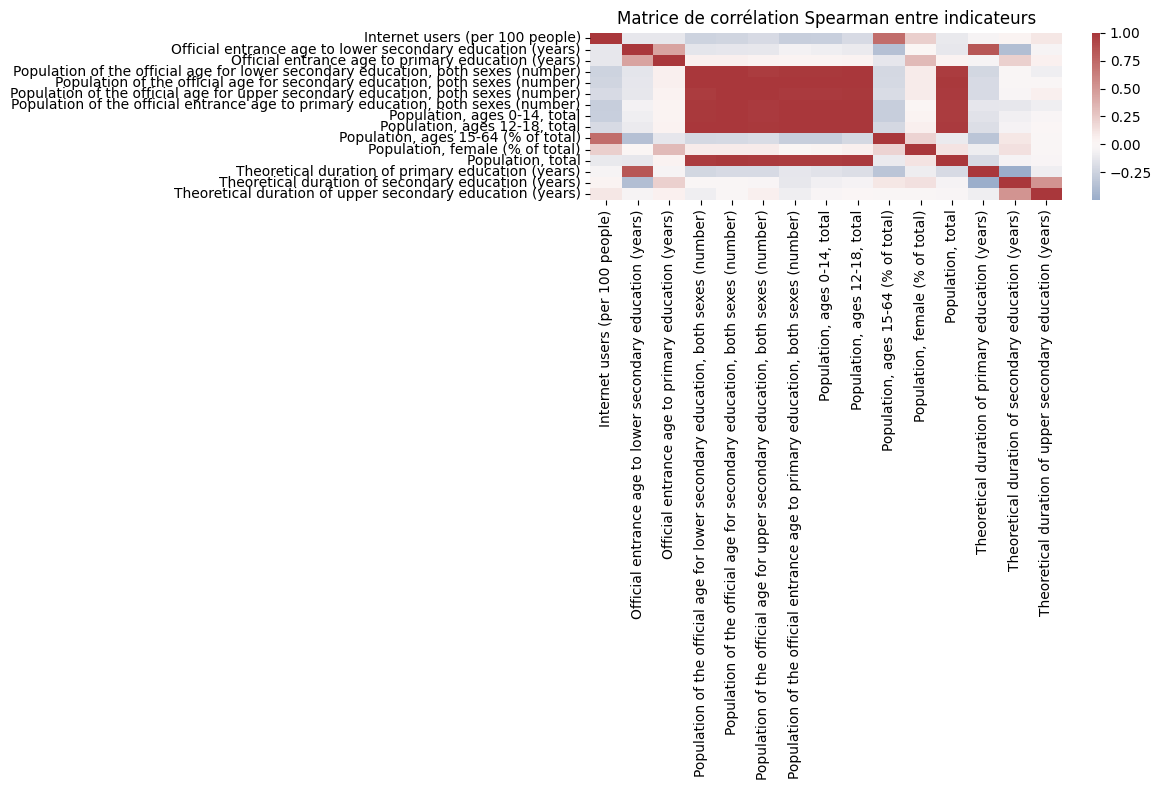

In [109]:
# heatmap Spearman
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_spearman, annot=False, cmap="vlag", center=0, ax=ax)
ax.set_title("Matrice de corrélation Spearman entre indicateurs")
plt.tight_layout()
plt.show()


Avant: 15 Après réduction: 6


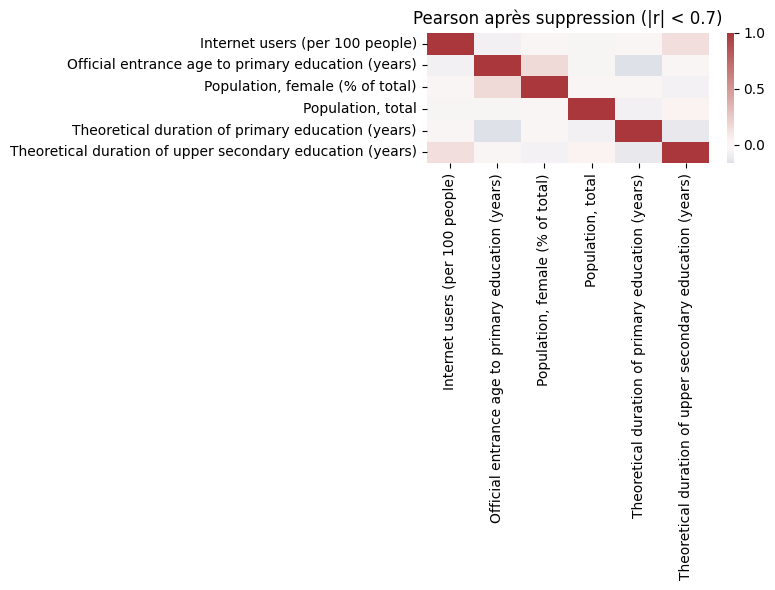

In [110]:
def reduce_by_threshold(corr_matrix, threshold=0.7):
    to_keep = list(corr_matrix.columns)
    while True:
        sub = corr_matrix.loc[to_keep, to_keep].copy()
        np.fill_diagonal(sub.values, 0)
        if not (sub.abs() >= threshold).any().any():
            break
        mean_abs = sub.abs().mean()
        drop_candidate = mean_abs.idxmax()
        to_keep.remove(drop_candidate)
    return to_keep

final_indicators = reduce_by_threshold(corr_pearson, 0.7)
print("Avant:", len(indicator_cols), "Après réduction:", len(final_indicators))

df_reduced = df_scored[["country_name"] + final_indicators].copy()

# vérif post-réduction
corr_reduced = df_reduced[final_indicators].corr(method="pearson")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_reduced, cmap="vlag", center=0, ax=ax)
ax.set_title("Pearson après suppression (|r| < 0.7)"); plt.tight_layout(); plt.show()


Analyse indicateurs restants

Statistiques descriptives :
count    187.000000
mean      32.035820
std       24.410220
min        0.000000
5%         2.522857
25%       10.174714
50%       27.061468
75%       50.613415
95%       75.741378
max       86.667408
Name: Internet users (per 100 people), dtype: float64


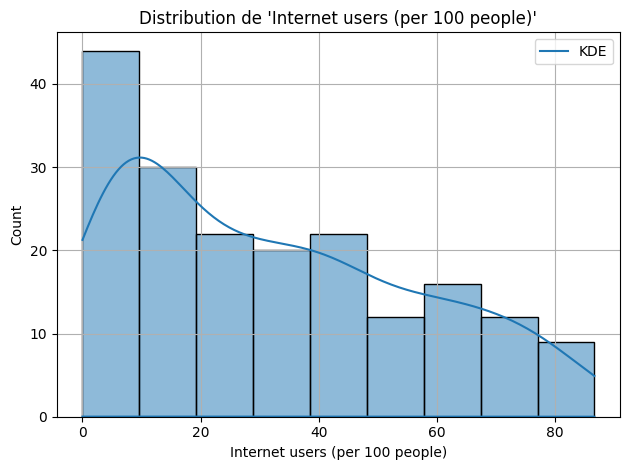

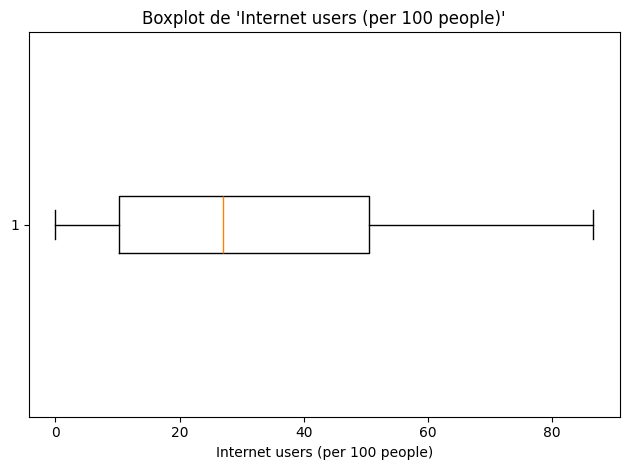

In [111]:
# extraire la série (pays × indicateurs réduit)
indicator_internet = "Internet users (per 100 people)"
series = df_country_indicator[indicator_internet].dropna()

# 1. statistiques descriptives
desc = series.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
print("Statistiques descriptives :")
print(desc)

# 2. histogramme + KDE
fig, ax = plt.subplots()
sns.histplot(series, kde=True, stat="count")


# estimation de densité
kde = gaussian_kde(series)
x_vals = np.linspace(series.min(), series.max(), 200)
ax.plot(x_vals, kde(x_vals), label="KDE")
ax.set_xlabel(indicator_internet)
ax.set_ylabel("Count")
ax.set_title(f"Distribution de '{indicator_internet}'")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

# 3. boxplot pour visualiser les outliers
fig, ax = plt.subplots()
ax.boxplot(series, vert=False, showfliers=True)
ax.set_title(f"Boxplot de '{indicator_internet}'")
ax.set_xlabel(indicator_internet)
plt.tight_layout()
plt.show()

In [112]:
def describe_and_plot(df, indicator, figsize=(6,4), show=True):
    """
    Calcule les stats descriptives d'un indicateur et trace sa distribution + boxplot.
    """
    series = df[indicator].dropna()
    desc = series.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
    print(f"\n=== {indicator} ===")
    print(desc)
    print(f"Skewness: {series.skew():.3f}, Kurtosis: {series.kurtosis():.3f}")

    # histogramme + KDE
    plt.figure(figsize=figsize)
    sns.histplot(series, kde=True, stat="count")
    plt.title(f"Distribution de '{indicator}'")
    plt.xlabel(indicator)
    plt.ylabel("Count")
    plt.tight_layout()
    if show:
        plt.show()



=== Internet users (per 100 people) ===
count    178.000000
mean      30.986870
std       24.387345
min        0.000000
5%         2.501856
25%        9.667905
50%       25.447695
75%       47.601294
95%       76.188272
max       86.667408
Name: Internet users (per 100 people), dtype: float64
Skewness: 0.602, Kurtosis: -0.820


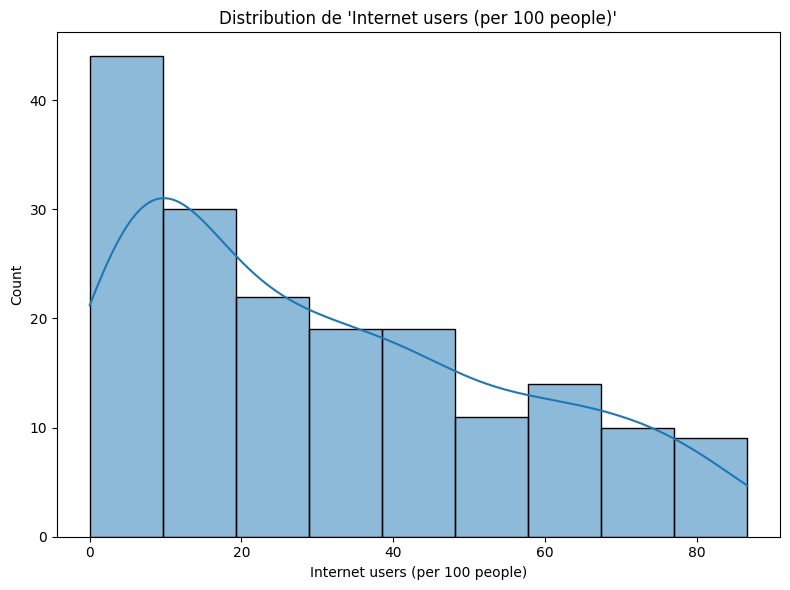

In [113]:
describe_and_plot(df_reduced, "Internet users (per 100 people)", figsize=(8, 6))


=== Internet users (per 100 people) ===
count    178.000000
mean      30.986870
std       24.387345
min        0.000000
5%         2.501856
25%        9.667905
50%       25.447695
75%       47.601294
95%       76.188272
max       86.667408
Name: Internet users (per 100 people), dtype: float64
Skewness: 0.602, Kurtosis: -0.820


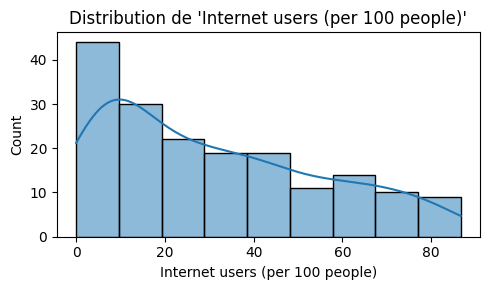


=== Official entrance age to primary education (years) ===
count    181.000000
mean       5.577986
std        0.544991
min        4.230769
5%         4.615385
25%        5.538462
50%        5.538462
75%        5.615385
95%        6.461538
max        6.461538
Name: Official entrance age to primary education (years), dtype: float64
Skewness: -0.009, Kurtosis: -0.147


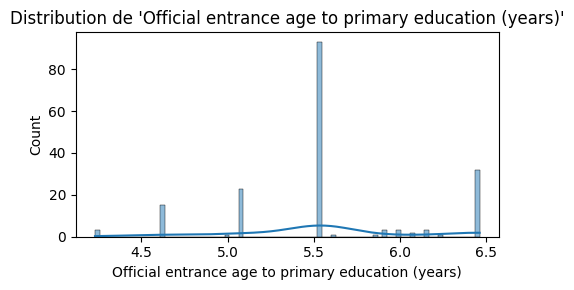


=== Population, female (% of total) ===
count    174.000000
mean      45.849142
std        3.457668
min       23.956972
5%        41.197281
25%       45.845227
50%       46.474235
75%       47.028709
95%       48.464162
max       49.997535
Name: Population, female (% of total), dtype: float64
Skewness: -4.374, Kurtosis: 22.337


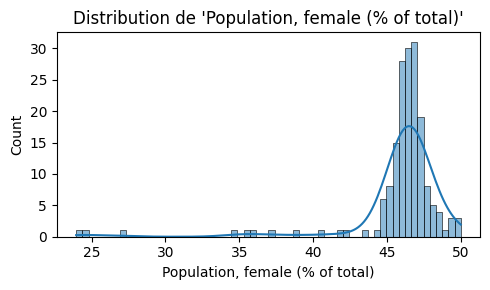


=== Population, total ===
count    1.810000e+02
mean     3.376149e+07
std      1.288537e+08
min      9.761308e+03
5%       9.441023e+04
25%      1.904068e+06
50%      7.112354e+06
75%      2.210746e+07
95%      1.178559e+08
max      1.237893e+09
Name: Population, total, dtype: float64
Skewness: 8.237, Kurtosis: 72.308


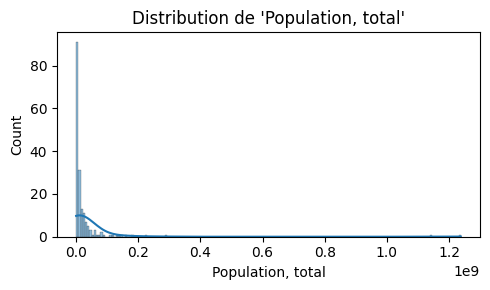


=== Theoretical duration of primary education (years) ===
count    181.000000
mean       5.210795
std        0.800041
min        3.000000
5%         3.692308
25%        4.615385
50%        5.538462
75%        5.538462
95%        6.461538
max        7.384615
Name: Theoretical duration of primary education (years), dtype: float64
Skewness: -0.581, Kurtosis: 0.116


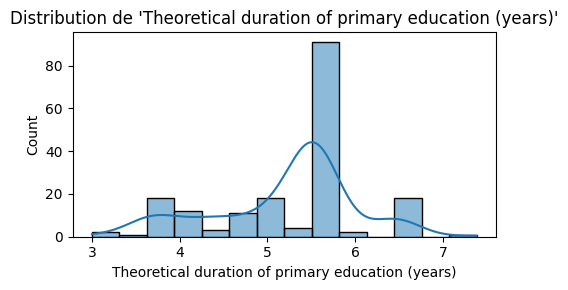


=== Theoretical duration of upper secondary education (years) ===
count    181.000000
mean       2.751806
std        0.692491
min        0.923077
5%         1.846154
25%        2.230769
50%        2.769231
75%        3.307692
95%        3.692308
max        4.615385
Name: Theoretical duration of upper secondary education (years), dtype: float64
Skewness: 0.246, Kurtosis: -0.333


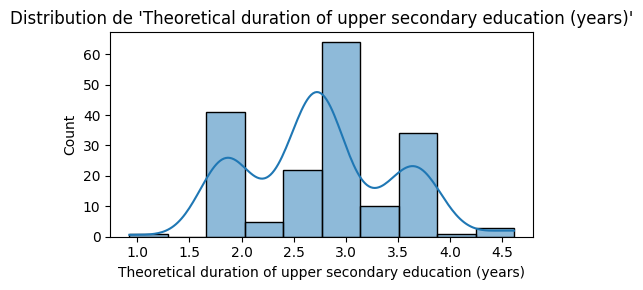

In [114]:
indicator_cols = [c for c in df_reduced.columns if c != "country_name"]
for ind in indicator_cols:
    describe_and_plot(df_reduced, ind, figsize=(5,3))


In [115]:
# liste des 6 indicateurs finaux
last6 = [
    "Internet users (per 100 people)",
    "Population, total",
    "Population, ages 15-64 (% of total)",
    "Population, ages 0-14, total",
    "Theoretical duration of secondary education (years)",
    "Official entrance age to primary education (years)"
]

top_k = 5 # compteur pour les pays dans les top 5 de chaque indicateur 
counter = Counter()
top_lists = {}

for ind in last6: 
    top_countries = df_country_indicator.nlargest(top_k, ind)["country_name"].tolist()
    top_lists[ind] = top_countries
    counter.update(top_countries) 

# tableau de fréquence 
freq_df = (
    pd.DataFrame(counter.items(), columns=["country_name", "count_in_top10"])
      .sort_values(by="count_in_top10", ascending=False)
      .reset_index(drop=True)
)

print("Top countries par fréquence dans les top 5 des 6 indicateurs :")
print(freq_df.head(20))

Top countries par fréquence dans les top 5 des 6 indicateurs :
              country_name  count_in_top10
0                    China               2
1                    India               2
2                 Bulgaria               2
3                Indonesia               2
4                  Iceland               1
5                  Nigeria               1
6              El Salvador               1
7                  Croatia               1
8                  Burundi               1
9   Bosnia and Herzegovina               1
10                 Austria               1
11         Slovak Republic               1
12                 Germany               1
13                Pakistan               1
14                  Kuwait               1
15                 Moldova               1
16                  Norway               1
17                 Bahrain               1
18                   Qatar               1
19    United Arab Emirates               1


In [116]:
# optionnel : afficher les top lists par indicateur
for ind, lst in top_lists.items():
    print(f"\nTop {top_k} pour '{ind}': {lst}")



Top 5 pour 'Internet users (per 100 people)': ['Iceland', 'Norway', 'Denmark', 'Sweden', 'Netherlands']

Top 5 pour 'Population, total': ['China', 'India', 'United States', 'Indonesia', 'Brazil']

Top 5 pour 'Population, ages 15-64 (% of total)': ['United Arab Emirates', 'Qatar', 'Bahrain', 'Kuwait', 'Moldova']

Top 5 pour 'Population, ages 0-14, total': ['India', 'China', 'Nigeria', 'Indonesia', 'Pakistan']

Top 5 pour 'Theoretical duration of secondary education (years)': ['Germany', 'Slovak Republic', 'Austria', 'Bosnia and Herzegovina', 'Bulgaria']

Top 5 pour 'Official entrance age to primary education (years)': ['Bulgaria', 'Burundi', 'Croatia', 'El Salvador', 'Equatorial Guinea']


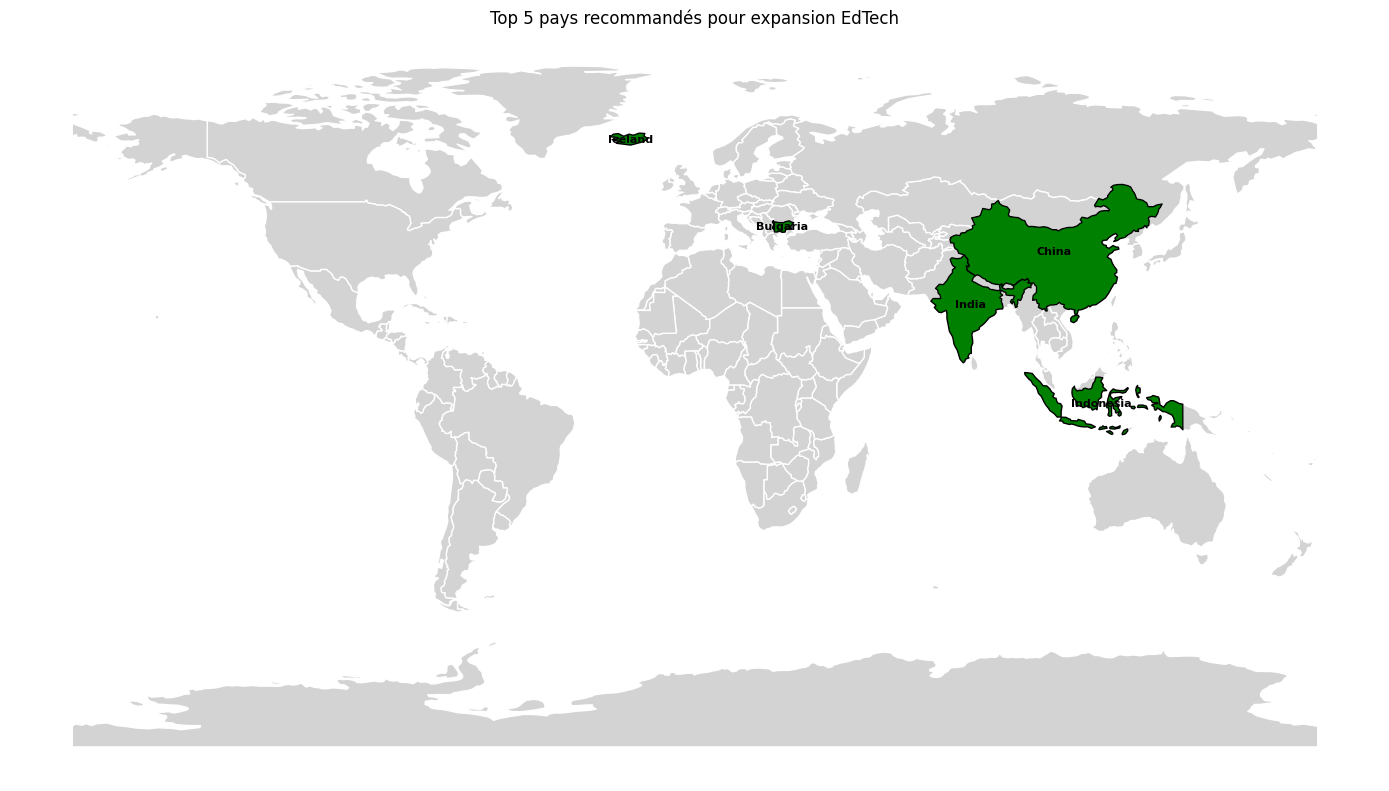

In [117]:

# adapte ce chemin à l'endroit où tu as dézippé
shapefile_path = "/Users/axellerolain/Desktop/DATA ENG/P2/ne_110m_admin_0_countries.shp"

# charger le monde
world = gpd.read_file(shapefile_path)

# top 5
top5 = ["China", "India", "Bulgaria", "Indonesia", "Iceland"]
# construire une colonne de mise en évidence
world["highlight"] = world["NAME"].apply(lambda n: 1 if n in top5 else 0)

# plot
fig, ax = plt.subplots(figsize=(14,8))
world.plot(ax=ax, color="lightgray", edgecolor="white")
world[world["highlight"] == 1].plot(ax=ax, color="green", edgecolor="black")

# annotations pour les 5
for idx, row in world[world["NAME"].isin(top5)].iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row["NAME"], ha="center", va="center", fontsize=8, fontweight="bold")

ax.set_title("Top 5 pays recommandés pour expansion EdTech")
ax.set_axis_off()
plt.tight_layout()
plt.show()
